## Quantium Customer segmentation 
Using Recency Frequency and Monetary (RFM) analysis to understand customers behaviour

This project is aimed at better understanding the types of customers who purchase chips and their purchasing behaviour within the region and provide recommendations for commercial application. Two sets of data were provided for this analysis and they are transaction dataset and purchase behaviour dataset of customers. The features of the dataset are listed below

#### Transaction
NOTE This is a transactional level data i.e. one row per transaction  and of course there are multiple transactions in a day
* date - date of transaction per record
* store_nbr - the store number in which a transaction was carried out
* lylty_card_nbr - number assigned to commited or regular customers 
* tnx_id - tax id number
* prod_nbr - number assigned to a product
* prod_name - name of the product
* prod_qty - quantity of products sold per day
* tot_sale - sales per transaction

#### Purchase Behaviour
* lylty_card_nbr - number assigned to commited or regular customers
* lifestage - identifies a customers family status and whether they are senior citizens or not
* premium_customer - customers purhaing power


In [1]:
#Importing the required packages for the analysis
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Loading both datasets into pandas 
trans = pd.read_excel('QVI_transaction_data.xlsx')
purchase = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
#Displaying the first  rows or observations
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Looking at the dataset there is need to seperate the text from numbers in the prod_name column so that we have 2 columns made of product name and product size. We will do the seperation just after coverting the column names from upper to lower case

In [4]:
#converting the header or column names from upper to lower case
trans.columns = map(str.lower, trans.columns)
trans.columns

Index(['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr',
       'prod_name', 'prod_qty', 'tot_sales'],
      dtype='object')

In [5]:
# stripping the size from the prod_name column and creating a new column with the prod_size in grams
trans['prod_size "g"'] = trans['prod_name'].str.strip(r'\d+')
trans['prod_size "g"'].replace(r'[A-Za-z\D+]', '', regex=True, inplace=True)
trans['prod_name'].replace(r'\d+\w', '', regex=True, inplace=True)
trans['prod_name'] = trans['prod_name'].str.strip()
trans.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,"prod_size ""g"""
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [6]:
# Reodering the columns
trans = trans[['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr', 'prod_name', 'prod_size "g"', 'prod_qty', 
               'tot_sales']]

In [7]:
#Checking for duplicates
trans[trans[['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr', 'prod_name', 'prod_size "g"', 'prod_qty', 
               'tot_sales']].duplicated() == True]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,175,2,6.0


In [8]:
trans[trans.duplicated(keep=False)]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,175,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,175,2,6.0


In [9]:
trans.drop_duplicates(keep=False, inplace=True)

In [10]:
trans[trans.duplicated(keep=False)]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales


A record has duplicate i.e. occured twice and one of the occurence was dropped

In [11]:
#Checking if there are null values in the trans dataset
trans.isnull().sum()

date              0
store_nbr         0
lylty_card_nbr    0
txn_id            0
prod_nbr          0
prod_name         0
prod_size "g"     0
prod_qty          0
tot_sales         0
dtype: int64

There are no null values in the transaction dataset. Lets go ahead to load and display the purchase behaviour dataset

In [12]:
#Displaying the first 5 records of the purchase dataset
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
#Converting column names from upper to lower case in purchase dataset
purchase.columns = map(str.lower, purchase.columns)
purchase.columns

Index(['lylty_card_nbr', 'lifestage', 'premium_customer'], dtype='object')

In [14]:
#Checking for null values in the purchase dataset
purchase.isnull().sum()

lylty_card_nbr      0
lifestage           0
premium_customer    0
dtype: int64

There are also no null values in the purchase dataset. We can now join the dataset on the column that is common to both dataset

In [15]:
#Combining transaction and purchase behaviour datasets and dispaying their shapes
comb = pd.merge(trans, purchase, on='lylty_card_nbr')
print(purchase.shape)
print(trans.shape)
print(comb.shape)

(72637, 3)
(264834, 9)
(264834, 11)


The combined dataset is has thesame number of columns as the dataset with the most observation indicating that no new column was added in the course of the combination or merging. From the merger performed every record in the transaction dataset was mapped to their respective purchase based on the 'lylty_card_nbr' column i.e. the individual that made the purchase. 

In [16]:
# combined dataset
comb.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [17]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              264834 non-null  datetime64[ns]
 1   store_nbr         264834 non-null  int64         
 2   lylty_card_nbr    264834 non-null  int64         
 3   txn_id            264834 non-null  int64         
 4   prod_nbr          264834 non-null  int64         
 5   prod_name         264834 non-null  object        
 6   prod_size "g"     264834 non-null  object        
 7   prod_qty          264834 non-null  int64         
 8   tot_sales         264834 non-null  float64       
 9   lifestage         264834 non-null  object        
 10  premium_customer  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 24.2+ MB


The combined dataset has a total of 11 features comprising of 1 datetime, 1 float, 5 int and 4 objects data types. All features has a total of 264834 entries. The data in one of the derived features 'prod_size "g"' is of data type string even though they are numbers. The data type of this column will to be converted to int data type.

In [18]:
#Converting 'prod_size "g"' to int data type
comb['prod_size "g"'] = pd.to_numeric(comb['prod_size "g"'], errors='coerce').astype('int64')

In [19]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              264834 non-null  datetime64[ns]
 1   store_nbr         264834 non-null  int64         
 2   lylty_card_nbr    264834 non-null  int64         
 3   txn_id            264834 non-null  int64         
 4   prod_nbr          264834 non-null  int64         
 5   prod_name         264834 non-null  object        
 6   prod_size "g"     264834 non-null  int64         
 7   prod_qty          264834 non-null  int64         
 8   tot_sales         264834 non-null  float64       
 9   lifestage         264834 non-null  object        
 10  premium_customer  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 24.2+ MB


The data now conprise of same 11 features 1 datetime, 1 float, 6 int and 3 objects data types

In [20]:
# High level summary of the data
comb.describe()

,store_nbr,lylty_card_nbr,txn_id,prod_nbr,"prod_size ""g""",prod_qty,tot_sales
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,135.080322,1.355497e+05,1.351585e+05,56.583245,182.427060,1.907308,7.304209
std,76.784431,8.058024e+04,7.813329e+04,32.826746,64.327436,0.643656,3.083235
min,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,150.000000,2.000000,5.400000
50%,130.000000,1.303580e+05,1.351385e+05,56.000000,170.000000,2.000000,7.400000
75%,203.000000,2.030948e+05,2.027018e+05,85.000000,175.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,200.000000,650.000000


The dataset has varying scale, mean and standard deviation. Though we will not be rescaling the data.

We will use histogram and boxplot to identify outliers. Outliers affects data distribution and skew it in the direction of the outlier . This makes it difficult to analyze the data.

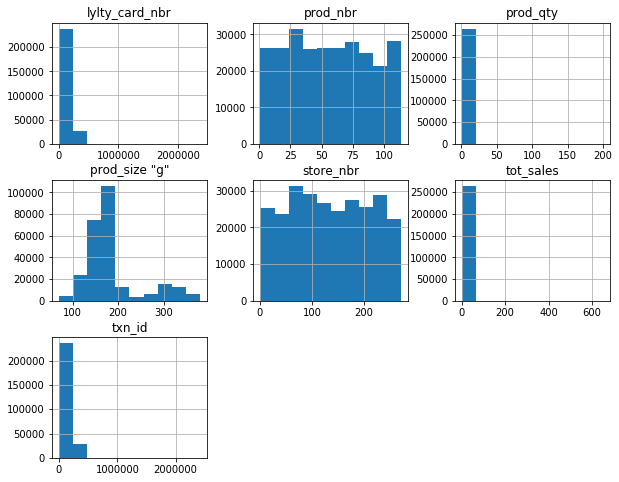

In [21]:
#identifying columns with outliers with a histogram chart
comb.hist(figsize=(10,8));

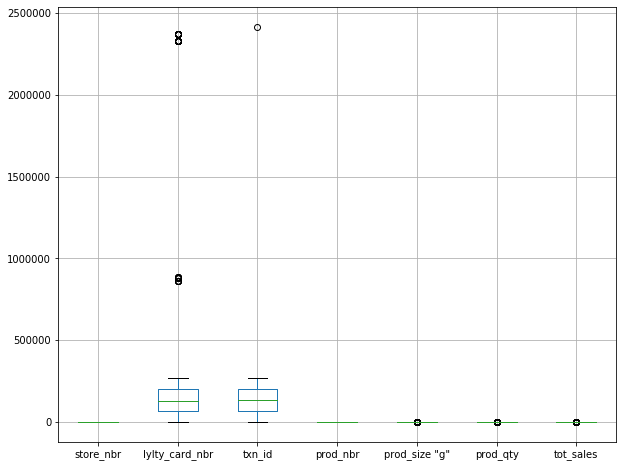

In [22]:
#identifying columns with outliers with a boxplot
comb.boxplot(figsize=(10,8));

As displayed in the boxplot there are some outlier and these need to be removed so that the accuracy of this analysis will not be affetced. We will analyze each column with outlier closely starting with 'lylty_card_nbr' and 'txn_id' columns. 

In [23]:
lyl_outlier = comb[(comb['lylty_card_nbr']) > 500000]
print(len(lyl_outlier))
lyl_outlier

44


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer
1951,2018-07-17,77,2330211,236744,94,Burger Rings,220,1,2.3,MIDAGE SINGLES/COUPLES,Budget
15782,2018-08-03,88,2370651,240350,4,Dorito Corn Chp Supreme,380,2,13.0,MIDAGE SINGLES/COUPLES,Mainstream
20322,2018-09-07,77,2330031,236717,19,Smiths Crinkle Cut Snag&Sauce,150,2,5.2,MIDAGE SINGLES/COUPLES,Premium
20323,2018-07-07,77,2330031,236716,102,Kettle Mozzarella Basil & Pesto,175,1,5.4,MIDAGE SINGLES/COUPLES,Premium
32030,2018-07-21,77,2330461,236777,87,Infuzions BBQ Rib Prawn Crackers,110,1,3.8,OLDER FAMILIES,Budget
42589,2018-09-14,237,880171,86305,32,Kettle Sea Salt And Vinegar,175,2,10.8,OLDER FAMILIES,Budget
42590,2018-09-28,237,880171,86306,24,Grain Waves Sweet Chilli,210,2,7.2,OLDER FAMILIES,Budget
42599,2018-09-04,237,880711,86566,31,Infzns Crn Crnchers Tangy Gcamole,110,2,7.6,OLDER FAMILIES,Budget
42600,2018-09-15,237,880711,86567,3,Kettle Sensations Camembert & Fig,150,2,9.2,OLDER FAMILIES,Budget
53393,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted,165,2,8.4,OLDER FAMILIES,Budget


In [24]:
#dropping outliers in lylty_card_nbr column
comb.drop(comb[comb['lylty_card_nbr'] > 500000].index, inplace=True)

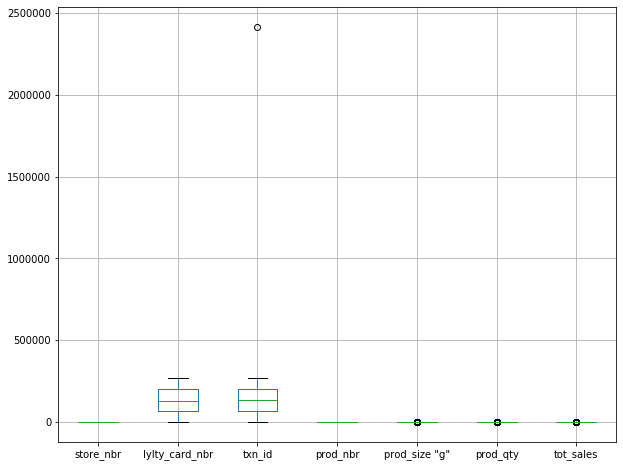

In [25]:
comb.boxplot(figsize=(10,8));

In [26]:
# dropping outliers in txn_id column
comb.drop(comb[comb['txn_id'] > 500000].index, inplace=True)

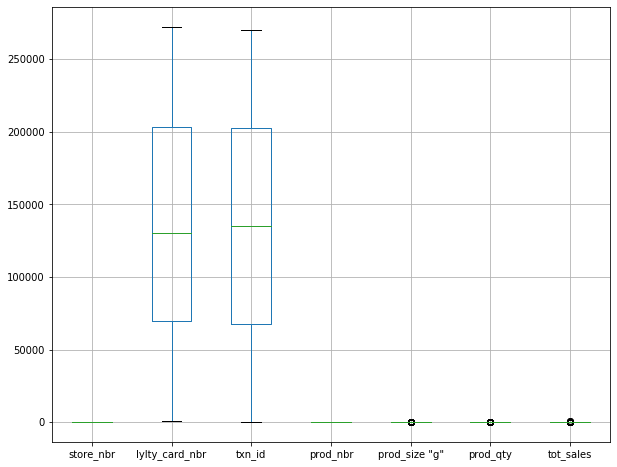

In [27]:
comb.boxplot(figsize=(10,8));

After taking out outliers in lylty_card_nbr and txn_id we still have some outliers let take a closer look at store_nbr, prod_nbr, prod_qty and tot_sales.

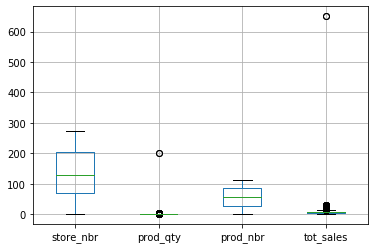

In [28]:
comb.boxplot(column=['store_nbr', 'prod_qty', 'prod_nbr', 'tot_sales']);

In [29]:
#displaying a dataframe with the outlier in total sales column
comb[comb['tot_sales'] > 600]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium


In [30]:
comb[comb['prod_qty'] == 200]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium


The above records is a case of one tax id being assigned to an individual. I do not think an individual with a particular loyalty card number will have two different tax id numbers. Only one tax id is usually assigned to a particular individual. In this case since the outlier for the 'prod_qty' and 'tot_sales' columns are from the same record i.e the record causing the outlier in 'prod_qty' and 'tot_sales' columns. We will delete both occurences of the observation and since its just two records our analysis accuracy will not be impacted by the deletion. More so since tax id is not one of the metrics to be used in the RFM analysis. 

In [31]:
# using the index number to deleting the observations that has two tax ids for an individual
comb = comb.drop([71456, 71457])

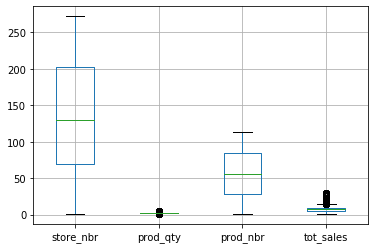

In [32]:
comb.boxplot(column=['store_nbr', 'prod_qty', 'prod_nbr', 'tot_sales']);

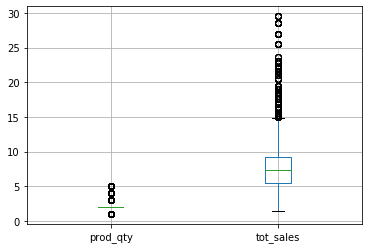

In [33]:
comb.boxplot(column=['prod_qty', 'tot_sales']);

We are left with 'prod_qty' and 'tot_sales'. I think these can be allowed to pass as obviously total sales per day and the quantity of products sold per day will always vary.

In [34]:
comb.to_csv('clean_quantium_customer.csv')

### Simple Visualization Analysis

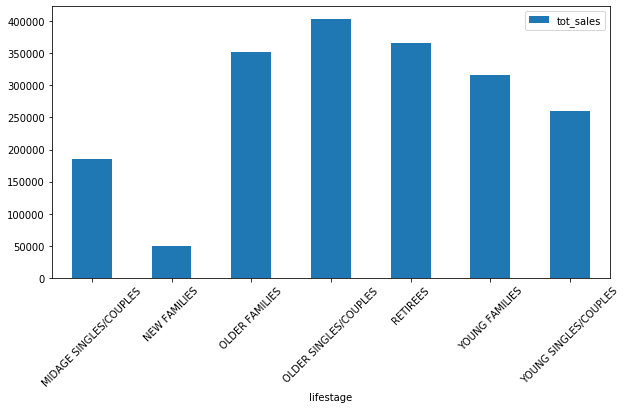

In [35]:
agg_lifestage = comb.pivot_table(index=['lifestage'], values=['tot_sales'], aggfunc='sum')
agg_lifestage.plot(kind='bar', rot=45, figsize=(10,5));

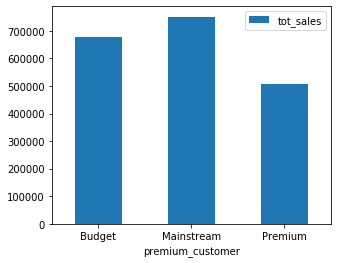

In [36]:
agg_prem = comb.pivot_table(index=['premium_customer'], values=['tot_sales'], aggfunc='sum')
agg_prem.plot(kind='bar', rot=0, figsize=(5,4));

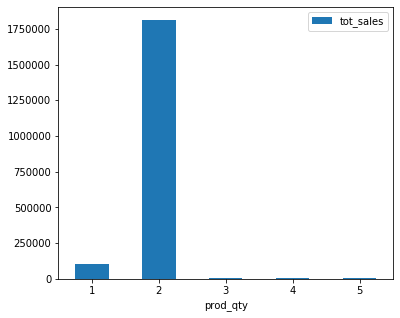

In [37]:
agg_prod_qty = comb.pivot_table(index=['prod_qty'], values=['tot_sales'], aggfunc='sum')
agg_prod_qty.plot(kind='bar', rot=0, figsize=(6,5))

In [38]:
prod_qty_2 = comb[comb['prod_qty'] == 2 ]
len(prod_qty_2)

236002

In [39]:
agg_year = comb.pivot_table(index=comb['date'].dt.year, values=['tot_sales'], aggfunc='sum')
agg_year

,tot_sales
date,
2018,976171.55
2019,956592.75


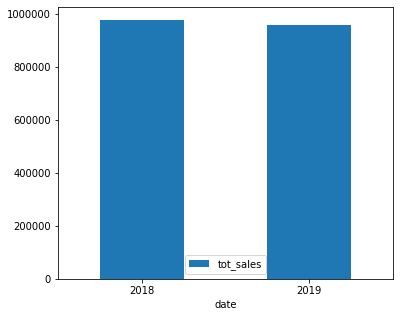

In [40]:
agg_year.plot(kind='bar', rot=0, figsize=(6,5));

In [41]:
agg_month_yr = comb.pivot_table(index=[comb['date'].dt.year, comb['date'].dt.month], values=['tot_sales'], aggfunc='sum')
agg_month_yr

tot_sales
date date           
2018 7     165250.80
     8     158046.45
     9     160442.80
     10    164368.50
     11    160196.00
     12    167867.00
2019 1     162642.30
     2     150665.00
     3     166265.20
     4     159845.10
     5     156717.65
     6     160457.50

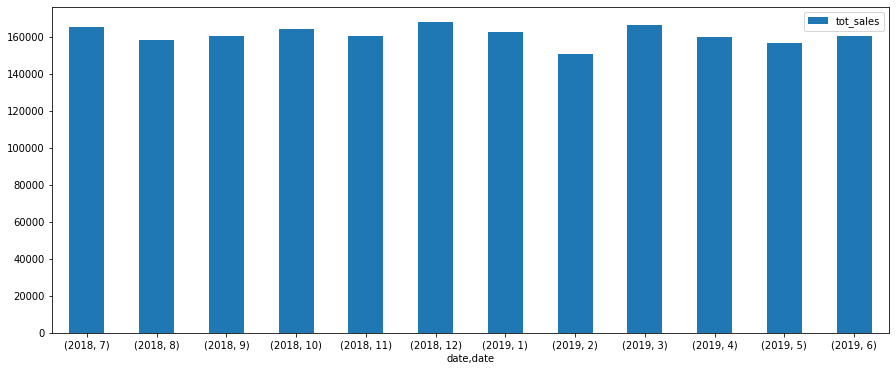

In [42]:
agg_month_yr.plot(kind='bar', rot=0, figsize=(15,6));

The above graphs has given a pictorial view of our dataset. The most sale came from customers buying 2 items in the period under review. Majority of the buying where from the budget and Mainstream customers. These customers are older or senior citizen of are single while others are not. 

There isn't much significant difference in the total sales for both years. However there is a trend in the monthly sales
The data set start from July 2018 to June 2019. A 12 months periods. Overall the graph shows a sinusoidal curve indicating rises and falls in total sales over the peiod under review. August 2018 was the greatest descrease while Decemeber of the same year saw the most increase in sales. There was a drop in total sales from July to August 2018 and it began to increase sligtly to a peak in October of thesame year. It later rose the following month and started a declined to February 2019. It rose significantly in March of 2019 and dropped from April to May 2019. It however rose to above 160,000 in the last month of the review period. 

For this analysis we will be using the Recency, Frequency and Monetary (RFM) metric analysis as such the date column will be decomposed into its conponents which are day, month and year.

The RFM metrics are important indicators for understanding customer behaviour because frequency and monetary values could affect a custome's lifetime value while recency affects the retention, which is a measure of engagement. The more recent a purchase, the more responsive the customer to promotion. The more frequently a customer buys, the more engaged and satisfied they are with the commodity. Monetary value differentiate heavy spenders from low-value purchasers.

To achieve this we will use the following columns:

Recency - days Frequency - lylty_card_nbr Monetary - tot_sales Let us assume this analysis is being carried out 1st July of 2019. With is assumption we wil calculate the number of days a transaction occurred. This will enable us analyze the recency of transactions

In [43]:
#decomposing the date to generate days and convert the days to float
sd = dt.datetime(2019,7,1)
comb['days'] =sd - comb['date']
comb['days'].astype('timedelta64[D]')
comb['days']=comb['days'] / np.timedelta64(1, 'D')
comb.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer,days
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium,257.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget,48.0
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget,233.0
3,2019-03-09,1,1307,347,54,CCs Original,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget,114.0
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget,42.0


In [44]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264787 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              264787 non-null  datetime64[ns]
 1   store_nbr         264787 non-null  int64         
 2   lylty_card_nbr    264787 non-null  int64         
 3   txn_id            264787 non-null  int64         
 4   prod_nbr          264787 non-null  int64         
 5   prod_name         264787 non-null  object        
 6   prod_size "g"     264787 non-null  int64         
 7   prod_qty          264787 non-null  int64         
 8   tot_sales         264787 non-null  float64       
 9   lifestage         264787 non-null  object        
 10  premium_customer  264787 non-null  object        
 11  days              264787 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 26.3+ MB


In pandas analysis are usually done in dataframes as such we will create a dataframe for the recency, frequency and monetary columns. As stated days will be mapped to recency, frequency to loyalty car number and monetary value to total sales.

In [45]:
#creating a rfm dataframe with respective columns
rfm_df = comb.groupby('lylty_card_nbr').agg({'days': lambda x:x.min(),         # Recency
                                        'lylty_card_nbr': lambda x: len(x),       # Frequency
                                        'tot_sales': lambda x: x.sum()})          # Monetary Value

rfm_df.rename(columns={'days': 'recency', 
                         'lylty_card_nbr': 'frequency', 
                         'tot_sales': 'monetary_value'}, inplace=True)

In [46]:
rfm_df.head(15)

,recency,frequency,monetary_value
lylty_card_nbr,,,
1000,257.0,1,6.0
1002,288.0,1,2.7
1003,115.0,2,6.6
1004,241.0,1,1.9
1005,185.0,1,2.8
1007,208.0,2,6.5
1009,223.0,1,5.7
1010,199.0,2,13.9
1011,194.0,4,18.0


In [47]:
#checking that the frequency in the rfm table correspond to the the frequency using Counter
from collections import Counter
dict_item = Counter(comb['lylty_card_nbr'])
#sorted(dict_item)
for k, v in sorted(dict_item.items()):
    print(k,v)

1000 1
1002 1
1003 2
1004 1
1005 1
1007 2
1009 1
1010 2
1011 4
1012 2
1013 2
1016 2
1018 3
1019 1
1020 3
1022 1
1023 1
1024 1
1025 1
1026 1
1027 2
1028 1
1030 1
1034 2
1038 1
1039 1
1042 4
1043 1
1044 1
1046 1
1048 3
1050 1
1051 1
1052 1
1053 2
1054 2
1055 1
1056 1
1057 3
1060 3
1061 1
1062 2
1064 2
1065 3
1067 1
1068 2
1071 2
1072 2
1074 1
1076 1
1077 1
1080 3
1081 4
1086 2
1087 2
1088 1
1089 1
1090 1
1091 1
1093 1
1094 3
1095 1
1096 1
1097 3
1099 2
1101 1
1102 1
1103 1
1104 4
1105 1
1107 1
1108 1
1109 1
1111 1
1113 1
1114 3
1115 1
1116 3
1117 1
1118 3
1120 1
1121 2
1122 1
1123 1
1124 2
1125 1
1127 1
1133 1
1134 3
1136 1
1137 1
1139 2
1140 1
1141 2
1142 2
1143 1
1146 4
1147 1
1149 1
1150 4
1152 1
1155 2
1156 1
1158 1
1159 4
1161 1
1163 2
1164 2
1165 1
1168 1
1169 2
1170 1
1171 1
1172 1
1173 4
1174 2
1177 1
1178 1
1179 4
1181 1
1182 2
1183 2
1184 1
1186 2
1187 1
1188 2
1189 2
1190 1
1191 1
1192 2
1193 1
1196 1
1197 1
1199 1
1201 1
1202 2
1203 1
1205 2
1206 3
1209 1
1210 1
1211 1
1212 2

6057 5
6058 1
6060 2
6061 2
6062 2
6063 2
6065 2
6066 3
6067 1
6069 1
6071 1
6073 2
6074 1
6075 2
6076 2
6077 1
6078 1
6079 3
6080 2
6083 2
6084 1
6085 2
6086 1
6087 3
6090 2
6091 3
6092 2
6095 1
6096 1
6097 1
6098 1
6099 2
6100 1
6101 2
6102 1
6103 1
6104 1
6105 3
6106 3
6107 2
6108 1
6109 1
6111 2
6112 1
6113 1
6114 1
6115 2
6117 1
6118 1
6119 1
6120 1
6123 1
6124 1
6126 1
6129 1
6130 3
6132 3
6133 3
6134 4
6137 1
6138 1
6140 1
6144 1
6145 2
6146 1
6147 1
6148 1
6149 2
6151 1
6152 2
6153 1
6155 2
6157 3
6158 2
6160 2
6165 1
6166 1
6168 2
6171 2
6172 1
6177 1
6178 2
6179 2
6181 1
6185 2
6187 2
6189 1
6191 3
6192 2
6193 2
6194 1
6195 2
6196 4
6197 1
6198 2
6199 1
6200 1
6201 1
6202 2
6203 2
6204 1
6206 1
6208 1
6209 1
6211 1
6214 1
6215 1
6217 2
6220 4
6221 2
6222 2
6225 3
6226 2
6227 1
6230 2
6232 1
6234 1
6235 2
6236 2
6237 1
6239 1
6241 1
6242 1
6244 2
6245 1
6246 2
6248 2
6249 1
6250 1
6251 1
6253 1
6255 1
6258 2
6259 1
6261 1
6262 1
6263 2
6265 1
6267 2
6268 2
6269 1
6270 2
6272 2

10221 3
10222 2
10223 6
10224 4
10225 5
10226 5
10227 9
10228 2
10229 9
10230 9
10231 8
10232 4
10233 7
10234 3
10235 6
10236 7
10237 5
10238 5
10239 4
10240 8
10241 6
10242 13
10243 8
10244 6
10245 7
10246 7
10247 2
10248 4
10249 3
10250 6
11363 1
11383 1
12000 2
12001 3
12003 5
12004 2
12005 2
12006 1
12007 1
12010 1
12012 1
12013 2
12014 3
12015 4
12016 1
12017 1
12018 1
12019 4
12020 3
12021 1
12022 1
12024 1
12025 2
12026 2
12027 2
12028 1
12029 2
12030 2
12031 1
12032 1
12033 2
12034 2
12035 1
12036 1
12037 1
12039 3
12040 3
12041 2
12042 4
12043 1
12044 3
12045 1
12047 2
12048 3
12051 3
12052 1
12053 1
12055 1
12056 2
12057 3
12058 1
12059 2
12060 1
12061 2
12062 2
12063 5
12064 1
12065 1
12066 2
12068 1
12069 1
12070 2
12071 1
12072 2
12073 1
12074 2
12075 2
12076 2
12077 1
12078 2
12079 1
12080 3
12081 1
12082 4
12083 3
12084 3
12085 4
12086 1
12087 2
12088 3
12089 2
12090 3
12091 3
12092 2
12093 2
12094 3
12095 2
12096 3
12098 1
12099 1
12101 1
12102 1
12103 1
12104 1
12105 1

17017 2
17019 4
17020 2
17021 1
17022 2
17023 3
17024 2
17026 2
17027 1
17028 2
17029 1
17030 3
17031 2
17032 1
17033 3
17036 3
17037 2
17038 1
17039 3
17040 4
17041 2
17043 1
17044 1
17045 1
17046 2
17047 2
17048 1
17049 1
17050 1
17052 1
17053 1
17054 1
17055 1
17056 2
17057 3
17058 1
17059 2
17060 1
17061 1
17062 4
17063 2
17064 2
17065 2
17066 1
17068 1
17069 1
17070 2
17072 2
17073 1
17074 2
17075 1
17076 2
17077 6
17078 4
17079 3
17080 1
17081 4
17082 3
17083 2
17084 1
17085 2
17086 3
17088 3
17091 1
17093 1
17094 2
17095 4
17096 2
17098 1
17099 3
17100 1
17101 2
17102 1
17103 1
17106 3
17107 1
17109 1
17110 1
17111 1
17113 1
17115 2
17117 2
17118 1
17119 4
17120 2
17121 1
17122 3
17123 1
17125 1
17127 2
17128 1
17129 2
17131 2
17132 3
17133 1
17134 1
17135 5
17136 3
17137 1
17138 1
17139 3
17141 4
17142 2
17143 4
17144 1
17145 3
17146 1
17147 1
17148 1
17150 1
17151 3
17152 3
17153 2
17154 1
17155 1
17156 1
17157 3
17159 2
17160 1
17161 3
17162 3
17164 2
17165 2
17166 1
17167 3


22113 2
22114 1
22115 1
22116 1
22117 2
22118 2
22119 3
22120 2
22122 2
22123 1
22125 4
22127 1
22128 3
22130 1
22131 1
22132 1
22133 1
22134 1
22135 1
22136 3
22137 3
22138 1
22139 2
22141 3
22145 1
22146 2
22148 1
22149 1
22150 2
22151 1
22152 1
22153 1
22154 1
22156 1
22157 2
22158 3
22159 1
22161 3
22162 3
22163 1
22164 1
22165 1
22166 1
22167 3
22169 2
22170 2
22171 1
22173 1
22178 4
22180 1
22181 3
22182 1
22183 2
22184 2
22186 1
22187 2
22189 1
22190 1
22191 2
22192 3
22194 3
22198 3
22199 1
22200 3
22201 2
22202 1
22203 2
22204 2
22206 1
22208 1
22209 1
22210 2
22212 3
22214 1
22215 1
22216 1
22217 1
22218 2
22219 2
22220 1
22221 1
22222 1
22223 1
22224 2
22225 3
22226 2
22227 3
22228 1
22229 3
22230 1
22231 2
22232 1
22234 1
22237 1
22238 2
22239 1
22240 1
22241 2
22243 1
22244 2
22245 1
22246 2
22247 3
22248 2
22249 1
22251 4
22252 1
22253 1
22254 1
22255 1
22257 2
22258 1
22259 2
22260 1
22261 1
22262 2
22263 6
22265 2
22266 1
22267 3
22268 1
22269 2
22270 2
22272 1
22273 1


26007 3
26008 4
26009 5
26010 4
26011 12
26012 1
26013 2
26014 4
26015 5
26016 2
26017 4
26018 7
26019 2
26020 3
26021 2
26022 2
26023 2
26024 1
26025 3
26026 8
26027 5
26028 5
26029 3
26030 6
26031 4
26032 3
26033 1
26034 4
26035 5
26036 5
26037 5
26038 3
26039 6
26040 5
26041 3
26042 6
26043 4
26044 7
26045 8
26046 6
26047 2
26048 4
26049 6
26050 6
26051 5
26052 3
26053 3
26054 2
26055 2
26056 4
26057 6
26058 2
26059 5
26060 6
26061 2
26062 2
26063 3
26064 4
26065 6
26066 3
26067 4
26068 4
26069 10
26070 4
26071 2
26072 7
26073 5
26074 5
26075 2
26076 3
26077 6
26078 2
26079 4
26080 7
26081 8
26082 8
26083 6
26084 5
26085 4
26086 6
26087 9
26088 6
26089 7
26090 3
26091 4
26092 6
26093 6
26094 3
26095 3
26096 7
26097 2
26098 8
26099 7
26100 1
26101 3
26102 5
26103 4
26104 3
26105 6
26106 5
26107 4
26108 3
26109 3
26110 5
26111 3
26112 5
26113 7
26114 3
26115 2
26116 6
26117 7
26118 7
26119 2
26120 4
26121 2
26122 4
26123 3
26124 7
26125 2
26126 5
26127 6
26128 2
26129 6
26130 6
26131 

30178 8
30179 5
30180 7
30181 6
30182 4
30183 7
30184 4
30185 6
30186 2
30187 5
30188 5
30189 7
30190 3
30191 9
30192 2
30193 7
30194 4
30195 3
30196 6
30197 7
30198 9
30199 11
30200 6
30201 5
30202 10
30203 5
30204 3
30205 5
30206 8
30207 10
30208 4
30209 9
30210 8
30211 5
30212 7
30213 9
30214 7
30215 6
30216 9
30217 7
30218 8
30219 7
30220 4
30221 7
30222 4
30223 4
30224 6
30225 8
30226 2
30227 1
30228 10
30229 5
30230 10
30231 7
30232 6
30233 4
30234 5
30235 4
30236 3
31048 1
31290 1
32000 7
32001 5
32002 13
32003 4
32004 2
32006 5
32007 7
32008 5
32009 4
32010 8
32011 9
32012 8
32013 3
32014 9
32015 4
32016 5
32017 4
32018 7
32019 5
32020 5
32021 5
32022 8
32023 6
32024 7
32025 5
32026 2
32027 7
32028 6
32029 10
32030 5
32031 4
32032 2
32033 6
32034 6
32035 7
32036 5
32037 12
32038 5
32039 6
32040 6
32041 11
32042 10
32043 9
32044 3
32045 7
32046 9
32047 3
32048 9
32049 5
32050 9
32051 4
32052 2
32053 6
32054 8
32055 9
32056 8
32057 6
32058 2
32059 8
32060 15
32061 5
32062 11
3206

36059 1
36060 4
36061 6
36062 6
36063 4
36064 6
36065 7
36066 2
36067 4
36068 5
36069 5
36070 7
36071 2
36072 6
36073 2
36074 4
36075 5
36076 1
36077 2
36078 5
36079 3
36080 3
36081 4
36082 3
36083 7
36084 8
36085 9
36086 3
36087 1
36088 5
36089 5
36090 4
36091 6
36092 4
36093 2
36094 4
36095 1
36096 5
36097 3
36098 3
36099 4
36100 3
36101 5
36102 2
36103 3
36104 2
36105 5
36106 7
36107 3
36108 2
36109 4
36110 4
36111 5
36112 1
36113 3
36114 2
36115 3
36116 5
36117 7
36118 5
36119 6
36120 4
36121 5
36123 5
36124 3
36125 2
36126 3
36127 2
36128 3
36129 5
36130 3
36131 3
36132 4
36133 1
36134 2
36135 3
36136 3
36137 3
36138 3
36139 3
36140 4
36141 3
36142 4
36143 4
36144 3
36145 5
36147 6
36148 3
36149 3
36150 2
36151 3
36152 5
36153 4
36154 1
36155 4
36156 3
36157 3
36158 6
36159 5
36160 4
36161 4
36162 1
36163 4
36164 2
36165 3
36166 3
36167 1
36168 2
36169 3
36170 4
36171 4
36172 8
36173 3
36174 2
36175 4
36176 2
36177 5
36178 3
36179 3
36180 3
36181 4
36182 4
36183 2
36184 3
36185 5


40316 4
40317 5
40318 2
40319 1
40320 7
40321 7
40322 4
40323 1
40324 7
40325 7
40326 5
40327 10
40328 4
40329 4
40330 2
40331 7
40332 6
40333 6
40334 3
40335 4
40336 8
40337 7
40338 5
40339 7
40340 6
40341 5
40342 3
40343 3
40344 9
40345 5
40346 6
40347 4
40348 6
40349 5
40350 6
40351 8
40352 4
40353 8
40354 4
40355 3
40356 5
40357 8
40358 3
40359 7
40360 6
40361 9
40362 2
40363 4
40364 4
40365 3
40366 3
40367 7
40368 4
40369 4
40370 4
40371 2
40372 3
40373 3
40374 8
40375 3
40376 4
40377 5
40378 2
40379 6
40380 4
40381 5
40382 2
40383 4
40384 5
40385 2
40386 6
40387 4
40388 3
40389 3
41001 1
41002 1
41003 3
41005 2
41007 2
41008 1
41010 1
41011 2
41014 1
41015 1
41016 1
41018 1
41019 2
41021 1
41022 2
41024 1
41025 1
41026 2
41027 1
41028 2
41030 2
41031 2
41032 2
41034 2
41035 2
41036 1
41041 1
41042 1
41045 3
41046 3
41048 1
41050 2
41051 2
41052 2
41053 1
41054 2
41055 2
41056 1
41057 1
41062 2
41063 2
41064 3
41065 2
41066 1
41067 1
41068 1
41069 1
41070 1
41072 3
41073 1
41075 1

46001 1
46002 1
46003 3
46005 1
46006 1
46007 2
46008 2
46009 3
46010 1
46011 2
46012 1
46014 1
46017 2
46018 1
46019 1
46020 1
46021 1
46022 3
46026 1
46027 1
46031 3
46032 1
46033 1
46034 1
46036 1
46039 2
46040 1
46041 2
46042 1
46043 1
46046 3
46047 2
46048 1
46050 1
46051 2
46055 1
46056 4
46057 1
46059 1
46060 1
46061 3
46062 1
46063 3
46064 2
46065 1
46066 2
46067 1
46068 1
46072 1
46073 1
46074 1
46075 1
46077 2
46078 1
46080 2
46082 2
46084 2
46085 1
46086 1
46088 2
46092 1
46094 1
46096 1
46097 3
46098 1
46100 2
46106 1
46107 1
46108 2
46109 1
46110 1
46111 3
46113 1
46115 1
46116 1
46117 2
46118 2
46119 1
46121 1
46122 2
46125 3
46126 2
46131 2
46132 1
46133 2
46135 1
46137 1
46138 4
46142 2
46147 1
46149 1
46150 2
46151 2
46152 2
46153 1
46155 2
46156 2
46157 2
46159 1
46160 2
46161 1
46163 1
46165 1
46167 1
46169 2
46170 4
46171 1
46173 1
46174 1
46175 2
46176 2
46177 4
46178 2
46179 3
46180 3
46181 3
46182 1
46184 1
46186 3
46187 2
46188 6
46191 2
46193 1
46194 1
46195 5


49288 6
49289 2
49290 3
49291 4
49292 4
49293 4
49294 4
49295 2
49296 3
49297 4
49298 8
49299 4
49300 4
49301 2
49302 4
49303 6
49304 3
49305 4
49306 2
49307 5
49308 6
49309 4
49310 7
49311 3
49312 1
49313 1
49314 1
49315 4
49316 1
49317 4
49318 5
49319 2
49320 7
49321 1
49322 4
49323 1
49324 3
49325 5
49326 4
49327 5
49328 2
49329 6
49330 2
49331 3
49332 3
49333 8
49334 3
49335 3
49336 2
49337 4
49338 1
49339 4
49340 5
49341 4
49342 5
49343 2
49344 1
49345 3
49346 4
49347 5
49348 4
49349 4
49351 4
49352 4
49353 4
49354 6
49355 4
49356 3
49357 2
49358 2
49359 4
49360 4
49361 7
49362 5
49363 5
49364 4
49365 4
49366 2
49367 3
49368 6
49369 7
49370 4
49371 2
49372 2
49373 5
49374 4
49375 2
49376 5
49377 1
49378 3
49379 4
49382 3
49383 4
49384 4
49385 7
49386 3
49387 2
49388 1
49389 3
50000 2
50001 1
50002 2
50004 3
50005 3
50006 1
50007 2
50009 1
50010 1
50011 2
50013 2
50014 1
50015 3
50016 1
50017 2
50018 3
50019 2
50020 1
50022 3
50024 3
50025 2
50026 2
50028 3
50030 1
50031 2
50032 3


55024 4
55025 7
55026 10
55027 5
55028 7
55029 6
55030 6
55031 4
55032 3
55033 5
55034 7
55035 5
55036 4
55037 4
55038 3
55039 6
55040 6
55041 3
55042 3
55043 7
55044 8
55045 6
55046 5
55047 13
55048 6
55049 4
55050 7
55051 3
55052 12
55053 4
55054 8
55055 4
55056 2
55057 7
55058 5
55059 5
55060 5
55061 6
55062 5
55063 8
55064 5
55065 6
55066 6
55067 9
55068 11
55069 7
55070 4
55071 3
55072 5
55073 8
55074 6
55075 6
55076 2
55077 8
55078 11
55079 13
55080 8
55081 5
55082 7
55083 4
55084 6
55085 11
55086 5
55087 5
55088 3
55089 5
55090 6
55091 2
55092 6
55093 8
55094 6
55095 4
55096 8
55097 4
55098 6
55099 3
55100 11
55101 5
55102 5
55103 5
55104 11
55105 1
55106 5
55107 5
55108 7
55109 4
55110 6
55111 9
55112 4
55113 10
55114 6
55115 5
55116 3
55117 12
55118 5
55119 2
55120 8
55121 4
55122 12
55123 8
55124 11
55125 14
55126 5
55127 9
55128 5
55129 9
55130 4
55131 5
55132 5
55133 7
55134 5
55135 3
55136 6
55137 7
55138 9
55139 2
55140 5
55141 7
55142 5
55143 5
55144 7
55145 7
55146 8
55

59293 3
59294 4
59295 2
59296 3
59297 7
59298 2
59299 3
59300 3
59301 4
59302 2
59303 3
59304 4
59305 4
59306 3
59307 7
59308 6
59309 4
59310 3
59311 4
59312 6
59313 6
59314 4
59315 2
59316 4
59317 2
59318 3
59320 2
59321 5
59322 7
59323 9
59324 10
59325 2
59326 3
59327 3
59328 6
59329 4
59330 3
59331 4
59332 5
59333 13
59334 6
59335 5
59336 2
59337 7
59338 3
59339 6
59340 2
59341 1
59342 6
59343 5
59344 1
59345 3
59346 5
59347 4
59348 5
59349 2
59350 1
59351 7
59352 3
59353 1
59354 5
59355 1
59356 5
59357 7
59358 3
59359 5
59360 3
59361 5
59362 3
59363 3
59364 3
59365 4
59366 2
59367 9
59368 4
59369 4
59370 1
59371 3
59372 6
59373 6
59374 1
59375 5
59376 4
60000 3
60001 4
60002 1
60003 5
60004 8
60006 4
60007 3
60008 7
60009 4
60010 6
60011 3
60012 4
60013 4
60014 6
60015 4
60016 5
60017 7
60018 4
60019 4
60020 3
60021 4
60022 6
60023 9
60024 5
60025 3
60026 6
60027 6
60028 3
60029 7
60030 4
60031 3
60032 5
60033 4
60034 3
60035 2
60036 3
60037 5
60038 2
60039 2
60040 3
60041 10
60042

65206 3
65207 4
65208 1
65209 4
65210 3
65211 8
65212 3
65213 3
65214 7
65215 4
65216 3
65217 4
65218 4
65219 4
65220 3
65221 2
65222 1
65223 1
65224 1
65225 2
65226 7
65227 3
65228 6
65229 1
65230 3
65231 2
65232 5
65233 6
65234 1
65235 6
65236 3
65237 3
65238 3
65239 7
65240 4
65241 6
65242 2
65243 3
65244 6
65245 8
65246 4
65247 4
65248 2
65249 7
65250 2
65251 2
65252 7
65253 5
65254 7
65255 4
65256 3
65257 4
65258 2
65259 4
65260 4
65261 4
65262 4
65263 2
65264 3
65265 4
65266 3
65267 5
65268 7
65269 5
65270 4
65271 5
65272 4
65273 3
65274 8
65275 4
65276 5
65277 4
65278 3
65279 4
65280 4
65281 4
65282 4
65283 5
65284 2
65285 1
65286 2
65287 4
65288 4
65289 4
65290 3
65291 1
65292 1
65293 6
65294 6
65295 1
65296 3
65297 3
65298 4
65299 1
65300 2
65301 3
65302 4
65303 7
65304 5
65305 7
65306 5
65307 3
65308 4
65309 4
65310 3
65311 5
65312 2
65313 4
65314 4
65315 2
65316 2
65317 1
65318 3
65319 8
65320 5
65321 5
65322 5
65323 4
65324 4
65325 5
65326 3
65327 1
65328 4
65329 2
65330 3


69137 11
69138 5
69139 6
69140 7
69141 6
69142 5
69143 3
69144 9
69145 4
69146 3
69147 8
69148 5
69149 4
69150 3
69151 9
69152 9
69153 4
69154 13
69155 10
69156 10
69157 5
69158 5
69159 5
69160 11
69161 9
69162 11
69163 10
69164 4
69165 4
69166 5
69167 8
69168 4
69169 8
69170 7
69171 4
69172 6
69173 5
69175 9
69176 7
69177 3
69178 5
69179 6
69180 10
69181 6
69182 8
69183 4
69184 5
69185 3
69186 5
69187 5
69188 5
69189 3
69190 5
69191 5
69192 6
69193 8
69194 6
69195 3
69196 5
69197 5
69198 7
69199 6
69200 6
69201 5
69202 8
69203 10
69204 10
69205 6
69206 8
69207 10
69208 9
69209 6
69210 5
69211 5
69212 4
69213 5
69214 5
69215 4
69216 5
69217 8
69218 6
69219 3
69220 8
69221 6
69222 6
69224 6
69225 6
69226 6
69227 10
69228 1
69229 6
69230 8
69231 7
69232 10
69233 8
69234 4
69235 8
69236 7
69237 4
69238 2
69239 4
69240 6
69241 6
69242 7
69243 6
69244 2
69245 9
69246 4
69247 8
69248 6
69249 4
69250 4
69251 7
69252 4
69253 9
69254 8
69255 6
69256 5
69257 4
69258 3
69259 5
69260 6
69261 5
700

74252 1
74253 1
74254 2
74255 1
74256 1
74258 1
74260 2
74262 1
74263 1
74264 2
74266 1
74267 1
74268 1
74271 2
74273 2
74274 1
74276 1
74277 1
74279 3
74280 1
74281 1
74285 3
74287 2
74288 2
74289 1
74292 1
74294 1
74295 1
74299 1
74301 1
74303 1
74306 1
74307 2
74309 2
74310 2
74311 1
74312 1
74313 1
74314 1
74315 3
74316 1
74317 3
74318 1
74320 1
74321 2
74323 1
74325 1
74326 1
74327 1
74328 2
74329 1
74330 1
74335 1
74336 1
74337 1
74338 1
74339 1
74340 1
74341 1
74344 2
74345 3
74348 1
74350 1
74351 4
74352 2
74353 1
74354 1
74358 1
74359 2
74360 1
74361 1
74362 1
74363 1
74365 1
74366 2
74367 1
74369 2
74373 1
74375 1
74379 2
74380 1
74383 1
74384 3
74385 2
74386 2
74387 5
74388 2
74389 1
74391 1
74394 2
74395 2
74398 1
74400 2
74402 2
74403 2
74404 1
74406 3
74408 1
74410 2
74411 2
74412 2
74418 1
74419 2
74420 1
74421 2
74425 1
74429 1
74430 1
74431 1
74433 2
74434 1
74435 3
74436 1
74437 2
74438 1
74440 2
74441 1
74442 1
74444 4
74445 1
74446 1
74448 1
74450 2
74451 1
74453 3


80000 2
80001 4
80002 3
80003 4
80004 2
80005 4
80006 4
80007 4
80008 4
80009 3
80010 1
80011 3
80012 4
80013 7
80014 2
80015 2
80016 2
80017 5
80018 3
80019 4
80020 5
80021 3
80022 1
80023 1
80024 7
80025 3
80026 4
80027 1
80028 1
80029 5
80030 3
80031 6
80032 2
80033 5
80034 4
80035 5
80036 4
80037 8
80038 4
80039 6
80040 3
80041 4
80042 3
80043 7
80044 4
80046 3
80047 4
80048 1
80049 1
80050 2
80051 2
80052 1
80053 5
80054 5
80055 5
80056 1
80057 6
80058 5
80059 2
80060 4
80062 6
80063 5
80064 1
80065 3
80066 4
80068 5
80069 4
80070 6
80071 4
80072 3
80073 4
80074 3
80075 4
80076 4
80077 6
80078 2
80079 4
80080 4
80081 2
80082 5
80083 4
80084 6
80085 2
80086 4
80087 4
80088 9
80089 3
80090 6
80091 1
80092 3
80093 5
80094 5
80095 6
80096 5
80097 4
80098 3
80099 5
80100 4
80101 4
80102 3
80103 4
80104 9
80105 3
80106 6
80107 4
80108 8
80109 8
80110 1
80111 8
80112 8
80113 3
80114 3
80115 3
80116 3
80117 4
80118 3
80119 4
80120 5
80121 3
80123 2
80124 2
80125 4
80126 3
80127 3
80128 3


82463 2
82465 1
82466 1
82468 1
82469 1
82470 1
82471 1
82472 2
82473 1
82474 1
82475 1
82476 2
82478 2
82479 1
82480 3
83000 6
83001 5
83002 6
83003 3
83004 6
83005 4
83006 5
83007 5
83008 11
83009 8
83010 12
83011 3
83012 11
83013 13
83014 9
83015 11
83016 6
83017 7
83018 3
83019 7
83020 4
83021 5
83022 9
83023 8
83024 4
83025 6
83026 7
83027 9
83028 5
83029 7
83030 8
83031 5
83032 8
83033 7
83034 5
83035 7
83036 5
83037 7
83038 10
83039 2
83040 4
83041 2
83042 5
83043 2
83044 5
83045 2
83046 8
83047 10
83048 5
83049 5
83050 3
83051 7
83052 7
83053 4
83054 3
83055 7
83056 6
83057 7
83058 2
83059 6
83060 1
83061 7
83062 7
83063 6
83064 5
83065 7
83066 10
83067 4
83068 8
83069 7
83070 9
83071 3
83072 2
83073 2
83074 5
83075 7
83076 4
83077 7
83078 6
83079 5
83080 3
83081 6
83082 4
83083 8
83084 5
83085 3
83086 4
83087 6
83088 7
83089 5
83090 5
83091 5
83092 6
83093 6
83094 5
83095 7
83096 13
83097 7
83098 10
83099 6
83100 3
83101 7
83102 5
83103 2
83104 7
83105 8
83106 4
83107 7
83108 

88366 4
88367 7
88368 6
88369 5
88370 2
88371 4
88372 1
88373 6
88374 6
88375 4
88376 4
88377 8
88378 1
88379 3
88380 5
88381 1
88382 3
88383 4
89001 3
89002 2
89003 3
89004 1
89006 1
89007 1
89008 2
89009 1
89012 1
89014 3
89015 1
89016 1
89017 3
89018 1
89021 1
89022 1
89024 1
89025 3
89026 2
89028 2
89030 1
89035 3
89038 1
89039 1
89040 2
89046 1
89047 2
89048 1
89049 3
89050 2
89051 3
89052 1
89053 1
89054 5
89058 2
89059 1
89060 5
89062 2
89064 1
89065 2
89066 1
89067 1
89070 2
89071 2
89073 2
89074 1
89077 1
89078 1
89079 1
89081 2
89083 1
89085 2
89086 1
89087 2
89089 2
89091 3
89094 1
89095 1
89096 2
89101 1
89102 4
89103 1
89104 1
89106 1
89107 2
89108 2
89111 2
89112 3
89114 2
89115 1
89116 2
89117 1
89118 1
89119 2
89121 3
89122 2
89124 1
89125 2
89126 2
89127 1
89128 1
89131 1
89132 1
89133 4
89135 1
89136 3
89137 1
89138 3
89139 1
89140 2
89141 2
89142 2
89143 6
89144 1
89145 1
89146 1
89147 1
89148 1
89149 1
89150 1
89151 1
89154 1
89159 2
89160 1
89162 3
89163 1
89164 2


93052 10
93053 11
93054 6
93055 7
93056 9
93057 3
93058 5
93059 3
93060 4
93061 7
93062 6
93063 7
93064 11
93065 4
93066 6
93067 13
93068 11
93069 3
93070 7
93071 6
93072 4
93073 9
93074 8
93075 7
93076 8
93077 5
93078 10
93079 3
93080 5
93081 12
93082 8
93083 7
93084 8
93085 7
93086 9
93087 7
93088 3
93089 3
93090 10
93091 5
93092 3
93093 3
93094 7
93095 10
93096 5
93097 8
93098 3
93099 4
93100 6
93101 8
93102 8
93103 4
93104 8
93105 5
93106 6
93107 4
93108 8
93109 10
93110 8
93111 8
93112 5
93113 6
93114 9
93115 7
93116 7
93117 9
93118 5
93119 3
93120 6
93121 10
93122 6
93123 7
93124 6
93125 1
93126 7
93127 7
93128 9
93129 7
93130 9
93131 7
93132 13
93133 8
93134 7
93135 8
93136 7
93137 9
93138 3
93139 4
93140 12
93141 8
93142 7
93143 7
93144 10
93145 3
93146 4
93147 11
93148 4
93149 7
93150 7
93151 9
93152 4
93153 8
93154 6
93155 7
93156 11
93157 6
93158 7
93159 7
93160 4
93161 8
93162 9
93163 7
93164 5
93165 6
93166 2
93167 5
93168 7
93169 3
93170 2
93171 8
93172 6
93173 12
93174 8

96324 1
96325 1
96326 1
96327 3
96328 3
96329 2
96330 2
96332 3
96333 3
96334 3
96335 3
96336 1
96337 2
96339 1
96340 1
96341 5
96342 1
96343 1
96345 1
96346 2
96347 2
96348 1
96351 1
96352 2
96354 3
96355 2
96356 1
96357 2
96358 2
96359 3
96360 3
96361 1
96362 1
96363 2
96364 2
97000 5
97001 6
97002 7
97003 5
97004 6
97005 10
97006 6
97007 6
97008 4
97009 5
97010 8
97011 5
97012 5
97013 8
97014 7
97015 5
97016 4
97017 8
97018 11
97019 4
97020 4
97021 8
97022 9
97023 5
97024 6
97025 6
97026 4
97027 5
97028 10
97029 5
97030 4
97031 11
97032 3
97033 10
97034 8
97035 5
97036 8
97037 7
97038 11
97039 6
97040 2
97041 2
97042 11
97043 8
97044 6
97045 4
97046 4
97047 5
97048 9
97049 8
97050 3
97051 6
97052 7
97053 3
97054 3
97055 6
97056 6
97057 5
97058 9
97059 7
97060 4
97061 7
97062 8
97063 8
97064 9
97065 7
97066 6
97067 13
97068 4
97069 8
97070 9
97071 4
97072 6
97073 1
97074 12
97075 5
97076 7
97077 7
97078 8
97079 11
97080 10
97081 3
97082 5
97083 7
97084 5
97085 7
97086 1
97087 10
9708

102140 13
102141 9
102142 5
102143 9
102144 7
102145 8
102146 3
102147 4
102148 7
102149 4
102150 7
102151 5
102152 4
102153 5
102154 4
102155 6
102156 4
102157 13
102158 2
102159 7
102160 5
102161 8
102162 7
102163 9
102164 3
102165 3
102166 5
102167 5
102168 5
102169 8
102170 6
102171 4
102172 4
102173 5
102174 5
102175 6
102176 8
102177 4
102178 7
102179 5
102180 5
102181 6
102182 5
102183 7
102184 10
102185 6
102186 7
102187 6
102188 6
102189 5
102190 2
102191 4
102192 4
102193 8
102194 7
102195 4
102196 10
102197 6
102198 5
102199 10
102200 9
102201 5
102202 11
102203 5
102204 8
102205 7
102206 5
102207 8
102208 9
102209 5
102210 4
102211 7
102212 4
102213 4
102214 8
102215 4
102216 5
102217 12
102218 7
102219 6
102220 8
102221 4
102222 4
102223 8
102224 7
102225 8
102226 3
102227 5
102228 7
102229 4
102230 6
102231 4
102232 8
102233 8
102234 3
102235 6
102236 12
102237 6
102238 7
102239 2
102240 3
102241 4
102242 11
102243 7
102244 5
102245 6
102246 4
102247 5
102248 6
102249 6
1

107045 9
107046 5
107047 4
107048 3
107049 7
107050 5
107051 6
107052 5
107053 7
107054 5
107055 8
107056 6
107057 1
107058 5
107059 4
107060 4
107061 7
107062 3
107063 6
107064 6
107065 8
107066 4
107067 11
107068 5
107069 4
107070 7
107071 7
107072 4
107073 8
107074 3
107075 7
107076 3
107077 11
107078 5
107079 7
107080 1
107081 9
107082 3
107083 5
107084 10
107085 3
107086 8
107087 8
107088 7
107089 6
107090 7
107091 4
107092 4
107093 10
107094 8
107095 13
107096 4
107097 5
107098 8
107099 3
107100 5
107101 8
107102 7
107103 3
107104 5
107105 4
107106 3
107107 2
107108 7
107109 4
107110 5
107111 2
107112 4
107113 3
107114 8
107115 6
107116 4
107117 6
107118 4
107119 7
107120 6
107121 7
107122 9
107123 9
107124 9
107125 5
107126 4
107127 7
107128 8
107129 8
107130 7
107131 10
107132 1
107133 9
107134 6
107135 3
107136 2
107137 10
107138 4
107139 3
107140 2
107141 4
107142 5
107143 7
107144 7
107145 5
107146 4
107147 8
107148 5
107149 8
107150 5
107151 4
107152 7
107153 6
107154 5
107

110238 4
110239 5
110240 4
110241 2
110242 5
110243 4
110244 4
110245 7
110246 6
110247 3
110248 10
110249 6
110250 9
110251 3
110252 2
110253 7
110254 9
110255 3
110256 3
110257 9
110258 7
110259 10
110260 5
110261 11
110262 5
111000 2
111001 2
111002 1
111003 1
111004 2
111005 1
111006 1
111007 3
111008 3
111009 2
111010 2
111011 2
111013 1
111016 3
111017 3
111020 1
111023 1
111025 2
111026 2
111029 1
111031 1
111033 4
111037 2
111039 1
111040 2
111041 2
111042 1
111044 1
111046 1
111048 1
111051 2
111052 1
111053 1
111054 1
111055 1
111056 4
111057 2
111059 3
111061 2
111062 1
111063 2
111064 3
111065 1
111069 2
111072 2
111073 1
111075 1
111078 2
111080 3
111081 2
111082 1
111084 1
111086 3
111087 1
111090 1
111092 2
111093 2
111094 2
111095 2
111097 2
111099 2
111100 2
111102 2
111103 1
111105 2
111107 2
111108 2
111111 1
111112 2
111113 2
111114 1
111116 2
111117 3
111118 1
111119 2
111121 1
111124 3
111126 2
111128 2
111129 3
111131 1
111132 2
111134 3
111135 2
111136 1
111137 

115246 1
115247 4
115248 2
115249 3
115250 3
115251 1
115252 2
115254 2
115260 3
115264 4
115265 2
115266 1
115267 2
115269 4
115270 1
115271 1
115272 2
115273 2
115274 1
115275 3
115276 1
115277 3
115278 1
115279 3
115280 1
115282 1
115285 1
115286 1
115289 3
115291 2
115292 1
115293 2
115294 1
115295 1
115296 1
115297 2
115298 2
115300 3
115301 1
115304 1
115305 2
115306 1
115307 1
115313 3
115315 1
115318 1
115319 3
115320 1
115323 1
115324 1
115325 2
115326 4
115328 1
115329 1
115330 1
115331 3
115333 1
115334 2
115335 1
115337 2
115338 3
115339 1
115341 1
115342 2
115343 2
115346 3
115347 1
115348 1
115349 1
115351 2
115352 1
115353 2
115354 1
115355 2
115357 2
115358 1
115361 1
115362 1
115363 3
115364 2
115366 2
115368 3
115369 1
115370 2
115374 2
115375 3
115376 3
115378 2
115379 3
115380 4
115381 1
115382 1
115383 1
115384 2
115385 1
115386 1
115387 1
115388 4
115389 1
115390 1
115391 1
115393 2
115394 1
115395 4
115397 3
115399 1
115400 1
115403 2
115404 1
115406 1
115407 1
1

119290 5
119291 6
119292 3
119293 2
119294 2
119295 3
119296 3
119297 3
119298 5
119299 5
119300 4
119301 5
119302 5
119303 2
119304 4
119305 2
119306 1
119307 3
119308 3
119309 3
119310 3
119311 1
119312 5
119313 5
119314 2
119315 1
119316 6
119317 4
119318 3
119319 5
119320 5
119321 6
119322 4
119324 4
119325 4
119326 5
119327 2
119328 2
119329 4
119330 3
119331 3
119332 3
119333 2
119334 4
119335 4
119336 1
119337 6
119338 4
119339 5
119340 1
119341 3
119342 3
119343 4
119344 2
119345 4
119346 1
119347 3
119348 2
119349 4
119350 5
119351 3
119352 5
119353 2
119354 1
119355 3
119356 7
119357 5
119358 6
119359 4
119360 4
119361 3
119362 4
119363 4
120000 1
120001 1
120003 1
120005 1
120007 2
120008 2
120012 3
120017 1
120019 1
120020 1
120021 1
120024 1
120025 1
120028 1
120029 1
120030 4
120031 2
120032 1
120035 1
120037 1
120038 2
120039 2
120041 1
120042 2
120043 1
120044 1
120045 1
120056 1
120057 1
120058 1
120060 1
120062 1
120063 1
120064 1
120066 2
120067 1
120068 1
120069 3
1

123007 3
123008 1
123009 6
123010 2
123011 4
123012 1
123013 3
123014 1
123015 6
123016 6
123017 5
123018 4
123020 3
123021 4
123022 1
123023 6
123024 1
123025 2
123026 2
123027 9
123028 5
123029 3
123030 5
123031 5
123032 4
123033 5
123034 3
123035 2
123036 2
123037 4
123038 2
123039 4
123040 4
123041 3
123042 6
123043 3
123044 2
123045 5
123046 7
123047 4
123048 2
123049 5
123050 4
123051 5
123052 4
123053 2
123054 3
123055 1
123056 4
123057 2
123058 4
123059 4
123060 3
123061 4
123062 3
123063 4
123064 1
123065 5
123066 7
123067 3
123068 2
123069 6
123070 2
123071 5
123073 2
123074 2
123075 2
123076 4
123077 8
123078 3
123079 5
123080 4
123081 2
123082 2
123083 2
123084 3
123085 4
123086 5
123087 4
123088 7
123089 7
123090 5
123091 6
123092 4
123093 4
123094 6
123095 4
123096 4
123097 5
123098 3
123099 6
123100 4
123101 1
123102 2
123103 1
123104 1
123105 3
123106 6
123107 1
123108 3
123109 2
123110 6
123111 4
123112 4
123113 6
123114 5
123115 5
123116 1
123117 6
123118 4
123119 4
1

125355 6
125356 2
125357 1
125358 2
125359 8
125360 4
125361 7
125362 4
125363 4
125364 5
125365 2
125366 4
125367 2
125368 2
125369 4
125370 3
125371 4
125373 2
125374 4
125375 3
125376 4
125377 7
125378 1
125379 6
125380 8
125381 6
125382 5
125383 6
125384 1
125385 6
125386 2
126000 1
126001 1
126002 2
126003 1
126004 2
126008 2
126011 3
126012 1
126014 2
126015 2
126016 3
126017 1
126018 3
126019 1
126020 2
126021 1
126022 3
126025 2
126026 1
126027 2
126030 3
126031 2
126033 3
126036 4
126037 2
126038 1
126040 3
126041 2
126042 2
126043 3
126045 2
126047 3
126048 5
126049 3
126050 1
126052 2
126054 2
126055 1
126056 2
126057 3
126059 3
126061 2
126062 3
126063 2
126065 1
126066 1
126068 1
126069 2
126070 3
126071 1
126072 1
126073 2
126074 1
126075 1
126076 2
126077 4
126078 1
126079 2
126080 1
126082 1
126083 2
126084 2
126086 1
126087 1
126088 2
126089 1
126095 3
126096 1
126097 2
126098 2
126099 2
126100 2
126101 1
126102 2
126104 1
126107 1
126108 3
126109 2
126110 1
126111 1
1

130087 4
130088 3
130089 2
130090 14
130091 7
130092 5
130093 1
130094 4
130095 8
130096 5
130097 5
130098 5
130099 5
130100 5
130101 7
130102 8
130103 2
130104 5
130105 4
130106 4
130107 6
130108 5
130109 4
130110 3
130111 2
130112 2
130113 4
130114 1
130115 4
130116 4
130117 5
130118 5
130119 4
130120 1
130121 6
130122 3
130123 4
130124 4
130125 3
130126 3
130127 5
130128 5
130129 3
130130 6
130132 2
130133 6
130134 4
130135 7
130136 2
130137 9
130138 8
130139 2
130140 5
130141 3
130142 3
130143 3
130144 5
130145 4
130146 7
130147 3
130148 2
130149 5
130150 2
130151 4
130152 7
130153 5
130154 1
130155 9
130156 3
130157 3
130158 4
130159 8
130160 10
130161 3
130162 3
130163 2
130164 1
130165 6
130166 4
130167 4
130168 2
130169 2
130170 6
130171 4
130172 1
130173 3
130175 3
130176 6
130177 1
130178 4
130179 5
130180 3
130181 2
130182 2
130183 5
130184 3
130185 2
130186 5
130187 3
130188 12
130189 4
130190 4
130191 3
130192 6
130193 7
130194 4
130195 3
130196 6
130197 3
130198 8
130199 

134102 1
134105 1
134106 3
134107 1
134108 1
134110 1
134112 1
134113 1
134114 3
134115 1
134116 1
134117 1
134118 2
134119 2
134120 4
134121 1
134122 1
134123 1
134125 2
134126 3
134127 2
134128 2
134129 1
134130 3
134131 4
134133 4
134134 2
134135 1
134136 1
134137 2
134138 1
134142 2
134144 5
134145 1
134146 1
134147 1
134148 4
134149 2
134150 3
134151 3
134152 4
134153 2
134154 1
134155 1
134156 2
134157 2
134159 4
134160 2
134161 4
134162 1
134163 2
134164 2
134165 3
134166 1
134168 3
134169 2
134170 1
134171 1
134172 2
134174 2
134175 2
134176 2
134178 2
134179 1
134180 2
134181 1
134184 1
134185 1
134186 1
134188 3
134190 2
134191 1
134192 1
134193 3
134194 1
134195 1
134197 3
134198 1
134199 2
134200 1
134202 3
134204 1
134205 1
134206 4
134207 1
134208 1
134209 3
134210 5
134212 2
134214 2
134215 1
134216 1
134217 3
134218 1
134219 1
134221 1
134225 1
134226 5
134227 2
134228 2
134229 2
134230 5
134231 3
134232 1
134233 2
134234 2
134235 1
134236 4
134240 5
134241 3
134243 1
1

140287 1
140288 1
140290 1
140293 1
140299 1
140300 1
140304 1
140319 1
140320 1
140331 1
140358 2
140372 1
140375 1
140386 1
140388 1
140404 1
140415 1
140416 1
140425 1
140460 1
140462 1
140469 2
140487 1
140490 1
140491 2
140492 1
140497 1
140501 1
141000 2
141001 2
141002 1
141003 1
141005 2
141006 2
141007 1
141008 1
141010 1
141011 1
141012 1
141013 1
141014 3
141015 1
141016 1
141020 2
141021 1
141022 1
141023 1
141024 1
141025 4
141026 2
141028 2
141029 3
141030 1
141031 1
141033 1
141034 1
141035 1
141036 1
141037 1
141038 1
141042 4
141043 2
141046 2
141049 2
141050 2
141051 2
141053 1
141054 1
141055 1
141056 2
141057 1
141058 1
141059 1
141061 2
141063 1
141064 1
141066 2
141067 3
141069 2
141070 1
141071 1
141073 2
141075 2
141076 1
141077 1
141078 2
141079 2
141080 1
141081 2
141082 3
141083 2
141084 2
141086 3
141087 4
141088 1
141090 2
141091 1
141092 2
141093 2
141094 1
141095 2
141096 2
141101 2
141102 1
141103 3
141104 1
141107 1
141108 2
141109 2
141110 2
141111 2
1

144045 9
144046 3
144047 4
144048 3
144049 1
144050 8
144051 5
144052 8
144053 2
144054 4
144055 4
144056 11
144057 7
144058 8
144059 8
144060 6
144061 7
144062 3
144063 7
144064 2
144065 7
144066 4
144067 3
144068 2
144069 5
144070 4
144071 10
144072 3
144073 5
144074 5
144075 3
144076 6
144077 6
144078 8
144079 2
144080 4
144081 4
144082 4
144083 7
144084 8
144085 5
144086 4
144087 4
144088 4
144089 5
144090 7
144091 6
144092 9
144093 3
144094 4
144095 3
144096 4
144097 8
144098 7
144099 4
144100 7
144101 6
144102 5
144103 6
144104 5
144105 3
144106 7
144107 5
144108 3
144109 6
144110 3
144111 6
144112 6
144113 5
144114 5
144115 6
144116 4
144117 3
144118 2
144119 7
144120 5
144121 9
144122 4
144123 6
144124 4
144125 2
144126 5
144127 5
144128 5
144129 6
144130 8
144131 6
144132 4
144133 4
144134 2
144135 5
144136 5
144137 7
144138 8
144139 4
144140 5
144141 6
144142 6
144143 8
144144 9
144145 8
144146 10
144147 3
144148 6
144149 11
144150 9
144151 5
144152 6
144153 4
144154 2
144155

148286 4
148287 1
148288 1
148289 4
148290 3
148291 3
148292 1
148293 4
148294 5
148295 8
148296 7
148297 4
148298 1
148299 1
148300 3
148301 2
148302 4
148303 2
148304 3
148305 3
148306 3
148307 6
148308 4
148309 4
148310 4
148311 1
148312 5
148314 2
148315 4
148316 1
148317 2
148318 2
148319 3
148320 6
148321 7
148322 1
148323 5
148324 4
148325 6
148326 4
148327 5
148328 1
148329 1
148330 3
148331 4
148332 3
148333 2
148334 6
148335 2
148336 2
148337 4
148338 7
148339 8
148340 4
148341 2
148342 4
148343 5
148344 3
148345 3
148346 4
148347 1
148348 5
148349 3
148350 7
148351 3
148352 5
148353 3
148354 5
148355 6
148356 4
148357 3
148358 2
148359 2
148360 2
148361 4
148362 3
148363 4
148364 2
148365 5
148366 5
148367 1
148368 2
148369 5
148370 2
148371 3
148372 3
148373 2
148374 6
148375 6
148376 3
148377 2
148378 8
148379 2
148380 1
148381 2
148382 5
148383 4
148384 4
149000 1
149001 2
149004 3
149005 4
149006 1
149007 4
149008 1
149009 2
149010 2
149011 5
149012 2
149013 2
149014 4
1

151448 1
151449 1
151450 2
151451 2
151455 1
151456 1
151458 2
151459 1
151460 1
151461 2
151465 1
151468 2
151470 2
151472 2
151473 1
151475 3
151476 2
151477 1
151479 4
151480 1
151482 1
151485 2
151486 1
151489 1
151490 1
151491 2
151492 1
151493 1
151494 1
151495 1
151496 1
151498 1
151499 4
152000 6
152001 10
152002 7
152003 6
152004 9
152005 9
152006 7
152007 13
152008 7
152009 8
152010 6
152011 9
152012 11
152013 11
152014 5
152015 5
152016 8
152017 6
152018 5
152019 4
152020 4
152021 3
152022 10
152023 11
152024 6
152025 6
152026 3
152027 5
152028 2
152029 2
152030 5
152031 5
152032 3
152033 7
152034 6
152035 12
152036 7
152037 5
152038 6
152039 5
152040 7
152041 7
152042 5
152043 11
152044 10
152045 10
152046 10
152047 6
152048 9
152049 7
152050 3
152051 4
152052 2
152053 8
152054 15
152055 5
152056 7
152057 8
152058 7
152059 2
152060 5
152061 10
152062 6
152063 6
152064 10
152065 5
152066 4
152067 7
152068 8
152069 6
152070 4
152071 8
152072 6
152073 4
152074 5
152075 6
15207

155006 2
155007 1
155008 2
155009 4
155010 8
155011 11
155012 6
155013 7
155014 6
155015 6
155016 1
155017 2
155018 3
155019 1
155020 6
155021 7
155022 7
155023 6
155024 6
155025 2
155026 6
155027 4
155028 8
155029 1
155030 7
155031 4
155032 8
155033 9
155034 6
155035 6
155036 5
155037 11
155038 10
155039 7
155040 9
155041 5
155042 9
155043 5
155044 5
155045 5
155046 1
155047 10
155048 9
155049 6
155050 3
155051 10
155052 6
155053 4
155054 6
155055 7
155056 5
155057 4
155058 2
155059 10
155060 12
155061 9
155062 9
155063 6
155064 4
155065 9
155066 4
155067 8
155068 5
155069 5
155070 4
155071 4
155072 4
155073 8
155074 4
155075 3
155076 4
155077 6
155078 5
155079 4
155080 7
155081 4
155082 11
155083 4
155084 7
155085 9
155086 5
155087 9
155088 7
155089 8
155090 3
155091 3
155092 10
155093 5
155094 7
155095 4
155096 12
155097 5
155098 8
155099 6
155100 7
155101 6
155102 7
155103 5
155104 10
155105 7
155106 3
155107 7
155108 4
155109 5
155110 7
155111 6
155112 5
155113 3
155114 7
155115 5

160099 7
160100 8
160101 5
160102 5
160103 6
160104 3
160105 4
160106 6
160107 6
160108 12
160109 8
160110 7
160111 4
160112 3
160113 2
160114 9
160115 3
160116 10
160117 6
160118 6
160119 8
160120 3
160121 8
160122 4
160123 8
160124 1
160125 3
160126 6
160127 6
160128 7
160129 6
160130 7
160131 7
160132 9
160133 2
160134 5
160135 8
160136 6
160137 7
160138 7
160139 7
160140 7
160141 5
160142 3
160143 8
160144 4
160145 7
160146 5
160147 10
160148 12
160149 5
160150 9
160151 9
160152 8
160153 8
160154 3
160155 9
160156 7
160157 5
160158 6
160159 8
160160 7
160161 7
160162 6
160163 9
160164 6
160165 8
160166 4
160167 3
160168 4
160169 4
160170 6
160171 7
160172 8
160173 6
160174 2
160175 3
160176 9
160177 4
160178 5
160179 10
160180 6
160181 6
160182 1
160183 6
160184 7
160185 6
160186 12
160187 4
160188 5
160189 9
160190 3
160191 9
160192 4
160193 8
160194 5
160195 5
160196 7
160197 6
160198 9
160199 6
160200 8
160201 10
160202 6
160203 8
160204 12
160205 8
160206 5
160207 4
160208 6
16

165211 6
165212 7
165213 4
165214 2
165215 8
165216 6
165217 6
165218 6
165219 8
165220 6
165221 4
165222 7
165223 4
165224 8
165225 1
165226 6
165227 6
165228 4
165229 4
165230 6
165231 5
165232 2
165233 6
165234 5
165235 10
165236 3
165237 6
165238 1
165239 4
165240 2
165241 6
165242 4
165243 2
165244 7
165245 2
165246 1
165247 2
165248 9
165249 5
165250 7
165251 4
165252 4
165253 4
165254 2
165255 5
165256 7
165257 6
165258 2
165259 2
165260 4
165261 5
165262 5
165263 6
165264 4
165265 2
165266 4
165267 3
165268 4
165269 5
165270 5
165271 5
165272 6
165273 12
165274 5
165275 7
165276 3
165277 5
165278 4
165279 4
165280 3
165281 6
165282 11
165283 7
165284 9
165285 6
165286 5
165287 2
165288 6
165289 4
165290 3
165291 5
165292 4
165293 5
165294 4
165295 3
165296 3
165297 4
165298 1
165299 8
165300 4
165301 4
165302 2
165303 6
165304 3
165305 4
165306 5
165307 4
165308 3
165309 2
165310 2
165311 7
165312 5
165313 6
165314 6
165315 5
165316 5
165317 5
165318 8
165319 1
165320 8
165321 

170005 1
170007 1
170009 2
170012 1
170013 5
170014 3
170015 1
170016 1
170017 1
170018 5
170019 2
170020 2
170021 1
170022 1
170023 3
170024 2
170026 1
170027 1
170028 1
170030 2
170032 1
170033 2
170034 2
170035 2
170037 1
170038 2
170040 3
170041 2
170042 1
170044 2
170046 1
170047 5
170048 1
170049 1
170050 1
170051 1
170052 3
170055 1
170056 2
170057 3
170058 1
170059 1
170060 1
170061 1
170065 1
170066 1
170067 1
170068 1
170069 1
170071 1
170072 1
170073 1
170074 1
170075 1
170076 1
170077 1
170078 1
170079 4
170081 1
170082 4
170083 2
170086 3
170089 1
170090 4
170091 2
170092 1
170093 2
170094 2
170095 2
170096 2
170097 1
170098 5
170099 1
170102 2
170106 1
170107 1
170108 1
170109 3
170110 1
170115 3
170116 2
170117 3
170118 1
170119 2
170121 1
170122 2
170123 2
170124 1
170126 1
170128 1
170130 3
170131 3
170132 1
170135 1
170139 2
170141 1
170143 2
170144 1
170145 1
170146 1
170147 2
170148 1
170150 2
170152 1
170153 2
170154 3
170155 1
170156 3
170157 1
170158 1
170159 2
1

173240 4
173241 2
173242 1
173243 3
173244 4
173245 1
173248 1
173249 1
173252 5
173253 3
173255 5
173256 2
173257 2
173258 2
173259 1
173261 2
173262 2
173263 1
173264 4
173265 5
173266 4
173268 1
173269 3
173272 1
173274 6
173275 1
173276 3
173277 2
173278 2
173279 1
173280 3
173281 2
173283 1
173284 2
173285 3
173286 2
173288 1
173289 5
173291 2
173292 1
173293 1
173294 1
173295 3
173296 1
173297 2
173298 3
173299 1
173300 2
173301 2
173303 1
173304 1
173305 2
173306 1
173307 1
173308 2
173309 1
173310 3
173311 2
173312 3
173313 1
173314 2
173315 5
173316 4
173317 1
173318 3
173319 3
173321 1
173322 4
173325 2
173326 1
173327 2
173328 3
173329 1
173330 2
173331 1
173332 4
173334 1
173335 2
173338 3
173339 3
173340 4
173341 2
173343 1
173344 6
173345 2
173346 3
173347 1
173348 2
173349 1
173350 3
173351 1
173352 2
173354 3
173355 2
173356 3
173357 1
173358 2
173359 2
173361 2
173362 3
173363 2
173364 2
173365 2
173366 1
173367 5
173368 3
173369 3
174000 2
174002 1
174003 1
174004 2
1

176337 1
176338 1
176339 2
176340 2
176341 1
176342 2
176343 1
176344 2
176346 1
176348 1
176349 1
176350 3
176351 2
176352 1
176353 3
176354 1
176355 1
176356 1
176359 3
176361 2
176362 1
176363 2
176364 2
176365 1
176366 2
176369 2
176370 1
176372 1
176374 1
176376 2
176377 3
176378 1
176379 4
176380 2
176381 2
176382 1
176384 1
176385 3
176386 1
176387 3
176389 1
176390 1
176391 2
176392 2
176393 2
176394 2
176395 1
176396 1
176397 3
176398 2
176400 1
176404 2
176405 1
176406 1
176408 1
176409 1
176410 1
176411 1
176414 1
176415 1
176416 2
176420 2
176421 1
176422 1
176424 2
176425 2
176428 1
176429 1
176430 2
176432 1
176434 2
176437 1
176440 1
176442 1
176443 1
176444 3
176445 1
176447 1
176448 4
176449 1
176451 1
176452 2
176454 1
176455 1
176456 1
176458 1
176459 1
176460 1
176464 2
176465 1
176467 1
176468 1
176469 2
176471 4
176472 2
176474 2
176475 1
176476 1
176477 1
176479 2
176480 2
176483 2
176485 2
176486 2
176488 2
176489 2
176490 1
176491 4
176492 2
176493 1
176494 1
1

182345 1
182346 3
182347 1
182348 1
182349 1
182351 2
182352 2
182353 2
182354 4
182356 1
182357 2
182359 1
182360 3
182362 1
182364 2
182365 3
182367 1
182369 1
182371 2
182373 4
182375 2
182376 3
182377 1
182380 2
182381 2
182382 1
182383 1
183000 10
183001 6
183002 4
183003 6
183004 4
183005 9
183006 5
183007 5
183008 11
183009 4
183010 7
183011 11
183012 5
183013 2
183014 11
183015 6
183016 12
183017 6
183018 7
183019 9
183020 11
183021 5
183022 6
183023 4
183024 5
183025 6
183026 5
183027 8
183028 11
183029 7
183030 6
183031 5
183032 6
183033 3
183034 3
183035 9
183036 4
183037 7
183038 11
183039 7
183040 4
183041 7
183042 4
183043 6
183044 8
183045 8
183046 11
183047 5
183048 4
183049 6
183050 10
183051 4
183052 8
183053 5
183054 7
183055 4
183056 5
183057 6
183058 9
183059 6
183060 4
183061 4
183062 7
183063 6
183064 7
183065 2
183066 8
183067 9
183068 7
183069 8
183070 9
183071 12
183072 5
183073 5
183074 1
183075 5
183076 8
183077 12
183078 2
183079 6
183080 6
183081 5
183082 

186344 1
186347 1
186348 2
186349 2
186351 2
186352 3
186354 2
186355 1
186357 2
186360 1
186361 1
186364 1
186365 1
186369 1
186370 1
186371 2
186374 1
186381 1
186383 1
186387 2
186389 3
186390 2
186391 1
186392 1
186393 2
186397 1
186398 2
186399 1
186400 3
186401 1
186404 2
186406 1
186408 1
186409 1
186410 1
186413 3
186416 3
186417 1
186418 2
186419 2
186421 2
186423 1
186424 2
186426 4
186427 1
186429 2
186432 1
186435 2
186436 1
186442 1
186444 1
186446 4
186447 2
186449 2
186451 1
186453 1
186454 1
186455 2
186456 1
186457 2
186460 1
186462 1
186464 2
186465 2
186466 1
186467 1
186471 1
186472 1
186473 2
186475 1
186477 1
186478 2
186480 1
186482 1
186483 1
186486 1
186488 1
186490 1
186492 1
186493 1
186495 1
186497 3
186498 2
187002 1
187003 3
187004 4
187006 1
187008 3
187009 4
187010 2
187014 3
187015 3
187016 1
187017 1
187018 1
187020 1
187021 1
187022 2
187023 2
187024 1
187025 1
187026 1
187028 2
187029 4
187031 2
187036 1
187037 4
187038 1
187039 1
187040 3
187041 2
1

189492 1
189493 2
189494 1
189495 2
190000 1
190001 3
190002 4
190003 4
190004 12
190005 3
190006 5
190007 1
190008 1
190009 10
190010 7
190011 9
190012 7
190013 3
190014 4
190015 5
190016 6
190017 10
190018 6
190019 5
190020 6
190021 4
190022 5
190023 4
190024 2
190025 7
190026 6
190027 6
190028 12
190029 5
190030 4
190031 10
190032 10
190033 4
190034 3
190035 5
190036 5
190037 6
190038 3
190039 5
190040 7
190041 4
190042 8
190043 7
190044 3
190045 5
190046 4
190047 6
190048 9
190049 4
190050 3
190051 4
190052 7
190053 3
190054 6
190055 7
190056 4
190057 4
190058 4
190059 9
190060 7
190061 2
190062 5
190063 8
190064 4
190065 6
190066 6
190067 3
190068 12
190069 7
190070 2
190071 8
190072 10
190073 8
190074 3
190075 5
190076 7
190077 3
190078 4
190079 2
190080 4
190081 7
190082 6
190083 6
190084 8
190085 4
190086 6
190087 6
190088 6
190089 7
190090 7
190091 6
190092 5
190093 6
190094 4
190095 9
190096 4
190097 6
190098 8
190099 3
190100 3
190101 7
190102 7
190103 3
190104 12
190105 6
1

195455 1
195459 1
195460 3
195461 2
195462 1
195463 1
195466 2
195468 1
195472 1
195474 1
195475 1
195476 2
195477 1
195478 1
195479 1
195481 1
195483 2
195484 2
196000 8
196001 9
196002 5
196003 4
196004 6
196005 7
196006 6
196007 1
196008 4
196009 7
196010 10
196011 6
196012 8
196013 5
196014 11
196015 6
196016 13
196017 3
196018 7
196019 7
196020 5
196021 5
196022 4
196023 12
196024 5
196025 4
196026 4
196027 5
196028 5
196029 10
196030 10
196031 6
196032 5
196033 4
196034 4
196035 5
196036 10
196037 6
196038 7
196039 11
196040 6
196041 4
196042 6
196043 5
196044 2
196045 4
196046 10
196047 6
196048 8
196049 8
196050 9
196051 11
196052 4
196053 6
196054 10
196055 10
196056 4
196057 7
196058 7
196059 7
196060 8
196061 8
196062 6
196063 11
196064 6
196065 10
196066 11
196067 4
196068 4
196069 6
196070 7
196071 6
196072 9
196073 4
196074 7
196075 5
196076 5
196077 8
196078 8
196079 6
196080 6
196081 6
196082 3
196083 5
196084 3
196085 10
196086 3
196087 7
196088 8
196089 6
196090 3
196

200073 1
200074 2
200075 1
200077 2
200078 1
200079 4
200080 3
200081 3
200082 1
200083 1
200085 1
200086 2
200088 2
200090 2
200092 1
200093 1
200094 2
200095 4
200096 2
200097 1
200099 2
200100 5
200102 1
200103 4
200104 3
200105 2
200106 1
200107 1
200108 1
200109 2
200111 2
200113 1
200114 1
200115 3
200117 4
200118 1
200120 4
200123 4
200124 1
200125 3
200126 1
200127 3
200129 1
200130 1
200131 2
200132 2
200133 2
200134 1
200135 1
200136 1
200137 1
200138 1
200139 2
200140 3
200141 1
200142 2
200143 3
200144 2
200147 1
200149 1
200150 2
200151 2
200153 2
200154 1
200155 3
200156 1
200157 1
200158 2
200159 1
200160 1
200161 2
200162 1
200163 3
200164 2
200165 5
200166 4
200167 1
200168 1
200169 3
200170 2
200171 1
200172 1
200174 4
200175 4
200179 4
200181 2
200182 1
200183 1
200184 1
200185 3
200186 1
200187 4
200188 3
200189 2
200190 5
200191 4
200192 2
200193 3
200194 1
200196 3
200197 1
200200 2
200201 4
200202 1
200204 1
200205 2
200206 1
200207 3
200208 3
200209 2
200210 1
2

203032 7
203033 4
203034 5
203035 7
203036 6
203037 6
203038 3
203039 7
203040 3
203041 2
203042 8
203043 2
203044 3
203045 4
203046 3
203047 5
203048 1
203049 3
203050 5
203051 4
203052 3
203053 3
203054 7
203055 5
203056 7
203057 4
203058 5
203059 2
203060 3
203061 2
203062 7
203063 4
203064 4
203065 8
203066 7
203067 5
203068 7
203069 3
203070 5
203071 7
203072 6
203073 4
203074 7
203075 6
203076 8
203077 3
203078 2
203079 4
203080 7
203081 4
203082 2
203083 7
203084 3
203085 4
203086 6
203087 6
203088 1
203089 1
203090 4
203091 9
203092 5
203093 5
203094 5
203095 1
203096 5
203097 3
203098 4
203099 7
203100 3
203101 6
203102 2
203103 1
203104 3
203105 7
203106 4
203107 4
203108 1
203110 4
203111 2
203112 3
203113 3
203114 6
203115 5
203116 4
203117 2
203118 2
203119 1
203120 1
203121 2
203122 5
203123 1
203124 1
203125 2
203126 5
203127 2
203128 6
203129 5
203130 4
203131 3
203132 1
203133 6
203134 4
203135 2
203136 2
203137 6
203138 4
203139 4
203140 2
203141 4
203142 4
203143 4
2

208049 5
208050 5
208051 4
208052 6
208053 5
208054 4
208055 6
208056 7
208057 3
208058 4
208059 4
208060 11
208061 5
208062 4
208063 5
208064 5
208065 12
208066 2
208067 3
208068 7
208069 6
208070 3
208071 3
208072 4
208073 5
208074 4
208075 7
208076 6
208077 4
208078 7
208079 7
208080 8
208081 4
208082 3
208083 4
208084 4
208085 5
208086 8
208087 9
208088 7
208089 8
208090 7
208091 6
208092 12
208093 6
208094 7
208095 3
208096 3
208097 2
208098 5
208099 4
208100 4
208101 4
208102 9
208103 9
208104 6
208105 2
208106 8
208107 10
208108 7
208109 4
208110 6
208111 9
208112 4
208113 3
208114 10
208115 4
208116 4
208117 4
208118 11
208119 4
208120 8
208121 6
208122 7
208123 1
208124 5
208125 4
208126 6
208127 3
208128 3
208129 4
208130 5
208131 7
208132 8
208133 3
208134 6
208135 6
208136 5
208137 5
208138 6
208139 6
208140 5
208141 6
208142 5
208143 6
208144 10
208145 3
208146 11
208147 7
208148 2
208149 5
208150 9
208151 5
208152 6
208153 7
208154 3
208155 4
208156 5
208157 8
208158 5
20

212163 2
212164 3
212165 10
212166 2
212167 6
212168 2
212169 5
212170 6
212171 8
212172 1
212173 5
212174 5
212175 3
212176 3
212177 5
212178 2
212179 6
212180 5
212181 3
212182 5
212183 5
212184 11
212185 14
212186 4
212187 2
212188 10
212189 4
212190 8
212191 3
212192 3
212193 4
212194 4
212195 1
212196 4
212197 4
212198 6
212199 3
212200 8
212201 5
212202 11
212203 4
212204 5
212205 6
212206 2
212207 10
212208 4
212209 1
212210 5
212211 7
212212 3
212213 5
212214 5
212215 7
212216 5
212217 5
212218 9
212219 5
212220 3
212221 1
212222 9
212223 4
212224 10
212225 6
212226 5
212227 4
212228 4
212229 1
212230 7
212231 9
212232 2
212233 6
212234 3
212235 8
212236 8
212237 5
212238 10
212239 6
212240 7
212241 6
212242 4
212243 3
212244 3
212245 5
212246 8
213000 8
213001 4
213002 9
213003 7
213004 4
213005 10
213006 4
213007 7
213008 7
213009 6
213010 12
213011 7
213012 6
213013 6
213014 13
213015 5
213016 7
213017 4
213018 6
213019 6
213020 4
213021 6
213022 4
213023 9
213024 1
213025 1

216154 5
216155 1
216156 7
216157 7
216158 5
216159 2
216160 5
216161 2
216162 3
216164 4
216165 2
216166 4
216167 2
216168 10
216169 3
216170 3
216171 6
216172 2
216173 2
216174 3
216175 6
216176 1
216177 3
216178 3
216179 5
216180 7
216181 2
216182 3
216183 3
216184 6
216185 6
216186 6
216187 6
216188 1
216189 4
216190 3
216191 7
216192 2
216193 5
216194 2
216195 2
216196 2
216197 3
216198 3
216199 1
216200 5
216201 1
216202 4
216203 5
216204 4
216205 4
216206 5
216207 7
216208 3
216209 1
216210 9
216211 5
216212 3
216213 3
216214 5
216215 3
216216 2
216217 5
216218 1
216219 3
216220 7
216221 3
216222 4
216223 1
216224 3
216225 5
216226 4
216227 3
216228 4
216229 4
216230 4
216231 3
216232 5
216233 4
216234 3
216235 7
216236 3
216237 4
216238 6
216239 4
216240 5
216241 5
216242 3
216243 1
216244 5
216245 4
216246 3
216247 5
216248 3
216249 11
216250 5
216251 4
216252 5
216253 4
216254 3
216255 6
216256 4
216257 4
216258 1
216259 5
216260 4
216261 2
216262 4
216263 2
216264 4
216265 4

220207 1
220208 1
220209 1
220211 5
220212 1
220213 1
220215 2
220216 3
220217 1
220218 2
220219 1
220220 1
220221 2
220225 3
220227 1
220228 1
220230 3
220231 2
220232 2
220233 3
220234 1
220235 2
220236 1
220240 1
220241 1
220242 2
220243 1
220245 3
220246 2
220248 1
220249 2
220250 1
220251 1
220252 2
220253 2
220254 1
220255 1
220256 2
220257 1
220258 1
220259 1
220261 2
220262 4
220264 1
220265 2
220266 2
220267 3
220268 1
220269 3
220270 1
220271 1
220272 2
220276 2
220278 2
220280 2
220281 3
220282 1
220283 1
220285 2
220286 1
220288 1
220289 1
220290 1
220292 1
220295 2
220296 1
220299 1
220300 2
220301 2
220302 1
220303 2
220306 1
220308 1
220309 2
220310 2
220311 2
220313 2
220314 2
220315 1
220316 1
220317 2
220318 1
220320 1
220321 1
220322 1
220324 5
220326 3
220327 1
220328 2
220329 2
220330 1
220331 1
220333 1
220334 1
220335 1
220336 1
220337 1
220338 1
220341 2
220342 3
220344 1
220345 2
220347 1
220348 1
220351 1
220354 1
220355 1
220356 2
220358 2
220360 2
220362 1
2

223183 9
223184 3
223185 4
223186 5
223187 2
223188 5
223189 7
223190 8
223191 5
223192 5
223193 8
223194 7
223195 4
223196 6
223197 4
223198 7
223199 5
223200 8
223201 4
223202 10
223203 6
223204 6
223205 5
223206 9
223207 11
223208 7
223209 9
223210 4
223211 6
223212 7
223213 4
223214 5
223215 7
223216 3
223217 5
223218 4
223219 7
223220 8
223221 7
223222 6
223223 6
223224 7
223225 1
223226 9
223227 4
223228 5
223229 6
223230 2
223231 11
223232 12
223233 6
223234 11
223235 7
223236 4
223237 8
223238 4
223239 10
223240 3
223241 5
223242 5
223243 3
223244 3
223245 10
223246 7
223247 3
223248 6
223249 5
223250 6
223251 8
223252 7
223253 4
223254 5
223255 8
223256 6
223257 5
223258 7
223259 9
223260 9
223261 5
223262 5
223263 10
223264 4
223265 4
223266 10
223267 8
223268 6
223269 9
223270 9
224001 1
224003 1
224010 1
224011 1
224019 1
224026 1
224031 2
224035 1
224036 1
224063 1
224073 1
224092 1
224101 1
224105 2
224112 1
224135 1
224142 1
224143 1
224145 1
224159 1
224163 1
224182 1
2

228010 1
228011 2
228012 3
228013 3
228014 2
228015 1
228016 1
228018 3
228019 3
228021 2
228025 3
228026 2
228027 1
228028 3
228029 2
228031 2
228033 3
228035 1
228036 4
228037 1
228039 3
228040 3
228041 1
228043 1
228044 3
228045 4
228046 1
228047 1
228049 1
228050 2
228051 1
228053 3
228055 1
228056 1
228057 1
228058 2
228059 2
228060 2
228061 2
228062 2
228064 1
228065 2
228067 3
228068 2
228069 1
228070 2
228073 2
228079 2
228080 1
228081 3
228082 2
228083 3
228085 1
228086 1
228087 5
228088 3
228089 2
228090 1
228092 4
228093 1
228094 1
228095 3
228097 3
228098 1
228099 3
228100 1
228103 1
228104 4
228105 1
228106 1
228108 2
228109 2
228110 1
228111 1
228112 3
228113 3
228115 2
228116 1
228117 2
228118 2
228120 1
228121 3
228122 2
228123 2
228124 1
228125 1
228126 2
228127 2
228129 1
228131 2
228132 2
228133 2
228134 2
228135 1
228136 2
228138 1
228139 2
228140 1
228141 1
228142 4
228143 2
228144 3
228145 3
228147 3
228148 1
228149 1
228150 2
228152 2
228153 1
228155 2
228156 2
2

232070 12
232071 4
232072 7
232073 8
232074 9
232075 6
232076 11
232077 5
232078 10
232079 3
232080 4
232081 9
232082 3
232083 13
232084 5
232085 3
232086 6
232087 2
232088 5
232089 3
232090 6
232091 9
232092 11
232093 2
232094 2
232095 10
232096 5
232097 4
232098 11
232099 3
232100 10
232101 8
232102 6
232103 4
232104 4
232105 8
232106 5
232107 4
232108 10
232109 2
232110 4
232111 6
232112 5
232113 5
232114 3
232115 7
232116 3
232117 3
232118 4
232119 6
232120 3
232121 4
232122 7
232123 7
232124 6
232125 4
232126 3
232127 8
232128 8
232129 8
232130 6
232131 7
232132 5
232133 4
232134 1
232135 4
232136 7
232137 3
232138 3
232139 4
232140 10
232141 5
232142 3
232143 5
232144 9
232145 5
232146 10
232147 4
232148 2
232149 5
232150 5
232151 2
232152 6
232153 7
232154 3
232155 7
232156 3
232157 3
232158 8
232159 10
232160 3
232161 5
232162 10
232163 3
232164 4
232165 4
232166 7
232167 6
232168 7
232169 5
232170 6
232171 7
232172 3
232173 4
232174 6
232175 4
232176 5
232177 8
232178 10
23217

235148 2
235150 1
235151 2
235152 2
235154 2
235155 3
235156 3
235157 3
235158 1
235159 2
235161 3
235162 1
235163 3
235164 2
235165 1
235166 2
235167 3
235168 1
235169 1
235170 1
235172 2
235173 1
235174 2
235175 3
235176 4
235177 1
235178 1
235179 1
235180 2
235181 1
235182 1
235183 2
235184 1
235186 1
235187 2
235188 1
235189 4
235190 1
235192 2
235193 1
235196 1
235197 1
235198 2
235199 2
235200 1
235201 1
235202 1
235203 2
235204 3
235205 1
235206 3
235207 2
235208 2
235209 3
235210 3
235211 4
235212 3
235213 1
235216 1
235217 3
235218 4
235219 3
235220 3
235221 1
235222 1
235224 3
235225 5
235226 3
235227 2
235228 3
235229 2
235230 5
235231 3
235232 2
235233 2
235234 3
235236 3
235237 1
235238 5
235239 1
235240 1
235241 1
235242 2
235243 3
235244 1
235246 4
235247 1
235248 1
235249 1
235250 1
235251 1
235252 3
235254 3
235255 3
235256 2
235259 2
235260 1
235262 1
235263 1
235265 1
235267 2
235268 1
235269 2
235272 2
235273 3
235274 1
235275 1
235277 2
235278 1
235279 1
235281 2
2

238239 4
238240 2
238241 4
238242 6
238243 2
238244 4
238245 3
238246 2
238247 4
238248 1
238249 3
238250 8
238251 5
238252 2
238253 3
238254 5
238255 3
238256 10
238257 3
238258 5
238259 7
238260 3
238261 6
238262 6
238263 4
238264 4
238265 4
238266 5
238267 3
238268 1
238269 4
238270 5
238271 5
238272 4
238273 4
238274 4
238275 5
238276 6
238277 6
238278 7
238279 3
238280 7
238281 5
238282 3
238283 4
238284 7
238285 3
238286 5
238287 5
238288 9
238289 2
238290 2
238291 2
238292 3
238293 4
238294 1
238295 4
238296 1
238297 6
238298 4
238299 1
238300 4
238301 4
238302 5
238303 5
238304 5
238305 3
238306 3
238307 4
238308 4
238309 5
238310 3
238311 6
238312 2
238313 4
238314 3
238315 4
238316 4
238317 7
238318 9
238319 5
238320 3
238321 3
238322 1
238323 3
238324 3
238325 1
238326 5
238327 3
238328 5
238329 2
238330 1
238331 3
238332 2
238333 3
238334 9
238335 2
238336 9
238337 7
238338 1
238339 2
238340 3
238341 4
238342 3
238343 3
238344 5
238345 7
238346 3
238347 3
238348 5
238349 5


241220 8
241221 2
241222 11
241223 4
241224 5
241225 6
241226 3
241227 3
241228 6
241229 6
241230 9
241231 8
241232 4
241233 3
241234 8
241235 1
241236 5
241237 1
241238 5
241239 7
241240 6
241241 4
241242 2
241243 3
241244 2
241245 4
241246 6
241247 8
241248 10
241249 5
241250 4
241251 5
242000 4
242001 1
242002 5
242003 2
242004 2
242005 2
242006 4
242008 2
242009 2
242010 4
242011 2
242012 3
242013 2
242014 1
242015 1
242016 1
242017 5
242018 4
242020 3
242021 3
242022 3
242023 1
242024 1
242027 4
242029 1
242031 1
242032 4
242033 2
242034 3
242035 1
242036 2
242038 3
242039 1
242040 2
242041 1
242042 1
242043 3
242044 1
242045 1
242047 1
242048 2
242049 1
242050 2
242051 1
242053 1
242054 3
242055 2
242056 1
242058 1
242059 2
242060 1
242061 2
242062 2
242063 1
242064 3
242065 4
242067 1
242068 2
242069 2
242070 2
242071 5
242072 3
242073 1
242074 3
242075 1
242076 3
242077 3
242078 1
242079 2
242082 1
242083 4
242085 3
242086 2
242087 3
242088 1
242089 1
242090 1
242091 1
242096 3

246016 1
246017 1
246019 3
246020 3
246021 1
246022 1
246023 3
246024 3
246025 1
246026 2
246030 3
246031 1
246032 3
246033 2
246034 5
246036 2
246037 3
246038 1
246039 2
246043 2
246044 1
246045 3
246046 2
246048 4
246049 1
246050 1
246052 2
246053 1
246054 5
246056 2
246057 1
246058 1
246059 2
246060 2
246061 1
246062 1
246063 3
246064 3
246065 3
246066 2
246067 1
246068 1
246070 1
246071 2
246072 4
246073 3
246075 1
246076 1
246077 1
246078 5
246080 2
246081 1
246082 1
246083 1
246084 7
246085 2
246086 2
246087 2
246088 1
246089 1
246090 1
246091 2
246092 1
246093 5
246094 3
246095 3
246096 2
246097 2
246098 5
246099 1
246100 1
246101 2
246102 3
246103 2
246104 1
246105 1
246106 3
246107 2
246108 1
246109 3
246110 3
246111 1
246112 2
246113 1
246114 1
246115 3
246117 1
246118 3
246119 3
246120 3
246121 3
246123 4
246125 3
246126 1
246127 3
246128 1
246129 1
246130 1
246131 3
246132 1
246133 5
246134 2
246136 1
246137 1
246138 2
246139 2
246141 1
246143 1
246144 2
246146 1
246147 2
2

249109 1
249111 1
249112 1
249114 1
249115 1
249116 3
249118 2
249119 1
249120 2
249121 2
249122 1
249124 1
249126 3
249127 1
249128 3
249129 3
249130 1
249131 1
249132 3
249135 2
249136 2
249137 3
249138 1
249139 1
249141 1
249144 2
249146 2
249148 5
249150 3
249151 1
249153 1
249154 1
249158 3
249159 2
249160 2
249161 2
249162 1
249163 2
249164 1
249168 4
249169 1
249171 3
249172 4
249173 1
249174 2
249176 1
249177 1
249178 2
249179 1
249180 1
249182 2
249183 1
249185 1
249188 1
249189 2
249191 3
249192 1
249193 1
249196 2
249202 1
249204 1
249205 1
249206 1
249207 1
249208 3
249209 1
249210 1
249212 3
249214 1
249215 1
249216 1
249217 1
249219 2
249222 1
249223 4
249224 1
249225 2
249228 2
249229 2
249231 1
249232 1
249234 1
249236 2
249237 1
249238 2
249239 2
249240 1
249241 3
249243 2
249245 3
249246 1
249247 1
249248 4
249249 2
249250 2
249251 1
249253 3
249254 1
249255 1
249256 3
249258 1
249259 3
249260 1
249261 1
249262 2
249264 3
249265 2
249266 1
249267 1
249269 1
249270 1
2

253126 2
253127 5
253128 1
253129 1
253130 4
253131 3
253132 2
253133 1
253134 3
253135 1
253137 2
253138 1
253139 2
253140 3
253142 2
253143 2
253144 3
253145 4
253148 1
253149 3
253150 2
253152 1
253154 1
253155 4
253156 1
253157 1
253158 1
253159 1
253160 3
253161 1
253162 3
253164 2
253165 2
253166 3
253167 3
253168 1
253169 1
253170 3
253171 2
253172 2
253173 1
253174 2
253176 2
253177 2
253178 1
253179 2
253180 3
253181 1
253183 1
253184 3
253186 1
253187 2
253190 1
253192 1
253194 4
253197 1
253198 2
253199 1
253200 2
253202 3
253203 1
253205 4
253207 1
253208 2
253210 1
253211 4
253213 3
253214 1
253215 1
253216 1
253218 1
253219 1
253221 2
253222 2
253223 1
253224 2
253225 3
253227 1
253228 1
253229 1
253230 1
253232 2
253233 1
253235 3
253236 3
253237 2
253238 1
253239 3
253240 2
253241 2
253243 3
253244 1
253245 1
253246 1
253247 4
253249 3
253250 1
253252 2
253254 1
253255 3
253256 2
253258 1
253260 1
253262 1
253263 1
253265 3
253267 2
253268 3
253269 1
253271 3
253273 1
2

259018 7
259019 6
259020 4
259021 11
259022 3
259023 7
259024 1
259025 2
259026 5
259027 10
259028 8
259029 3
259030 4
259031 7
259032 5
259033 8
259034 6
259035 6
259036 4
259037 4
259038 7
259039 9
259040 6
259041 3
259042 7
259043 7
259044 5
259045 6
259046 8
259047 7
259048 8
259049 8
259050 6
259051 8
259052 7
259053 8
259054 5
259055 11
259056 11
259057 4
259058 6
259059 4
259060 6
259061 7
259062 3
259063 3
259064 4
259065 10
259066 6
259067 10
259068 12
259069 6
259070 4
259071 3
259072 6
259073 8
259074 7
259075 3
259076 6
259077 6
259078 6
259079 7
259080 9
259081 10
259082 6
259083 7
259084 3
259085 12
259086 8
259087 5
259088 9
259089 5
259090 6
259091 12
259092 6
259093 9
259094 7
259095 5
259096 7
259097 5
259098 11
259099 4
259100 16
259101 9
259102 8
259103 5
259104 5
259105 6
259106 7
259107 6
259108 5
259109 12
259110 6
259111 4
259112 9
259113 10
259114 4
259115 8
259116 2
259117 6
259118 10
259119 8
259120 5
259121 7
259122 10
259123 11
259124 5
259125 7
259126 5
25

265077 1
265078 3
265079 3
265080 1
265081 3
265082 1
265083 2
265084 2
265085 2
265087 2
265088 1
265089 3
265091 4
265094 1
265095 2
265096 1
265098 2
265099 4
265100 1
265101 2
265102 2
265103 2
265105 1
265106 1
265107 2
265108 2
265109 2
265111 1
265114 2
265119 1
265121 1
265123 2
265124 4
265125 1
265127 1
265128 3
265129 1
265133 1
265134 1
265135 2
265137 1
265138 3
265139 1
265140 1
265141 1
265142 2
265143 1
265144 1
265146 1
265147 2
265149 1
265150 1
265151 2
265152 2
265153 2
265155 2
265157 2
265158 1
265160 2
265161 1
265163 1
265164 1
265167 2
265168 1
265170 2
265172 4
265174 4
265175 2
265176 2
265177 4
265178 1
265181 1
265182 1
265183 3
265184 3
265186 1
265187 3
265188 2
265189 1
265190 1
265191 1
265192 5
265193 2
265194 3
265198 1
265199 1
265200 1
265202 3
265203 2
265204 1
265205 1
265206 1
265207 1
265208 2
265209 1
265211 2
265212 1
265213 2
265214 1
265215 1
265217 2
265218 2
265219 2
265221 1
265222 1
265224 1
265225 2
265226 1
265228 1
265229 2
265230 3
2

269060 7
269061 6
269062 5
269063 9
269064 11
269065 4
269066 7
269067 10
269068 6
269069 4
269070 6
269071 5
269072 8
269073 6
269074 7
269075 7
269076 8
269077 4
269078 10
269079 4
269080 5
269081 13
269082 9
269083 2
269084 6
269085 4
269086 4
269087 5
269088 4
269089 7
269090 4
269091 8
269092 5
269093 9
269094 8
269095 2
269096 12
269097 3
269098 8
269099 7
269100 9
269101 10
269102 8
269103 12
269104 5
269105 8
269106 4
269107 7
269108 5
269109 8
269110 8
269111 5
269112 6
269113 2
269114 10
269115 2
269116 12
269117 8
269118 8
269119 6
269120 4
269121 7
269122 5
269123 6
269124 3
269125 6
269126 5
269127 9
269128 11
269129 10
269130 7
269131 9
269132 3
269133 7
269134 3
269135 5
269136 11
269137 9
269138 2
269139 5
269140 11
269141 9
269142 3
269143 2
269144 8
269145 6
269146 5
269147 6
269148 5
269149 7
269150 8
269151 3
269152 4
269153 3
269154 5
269155 1
269156 6
269157 7
269158 4
269159 13
269160 6
269161 8
269162 4
269163 8
269164 9
269165 7
269166 5
269167 7
269168 5
26916

The frequency of the loyalty card number column in the rfm table corresponds to that in the dict_item table hence it is accurate.

For convenience we will use quatile to segment customers and pass it to dict so that cutoff can be pulled out using an if  statement

In [48]:
quartiles = rfm_df.quantile(q=[0.25,0.50,0.75])
print(type(quartiles))
quartiles

<class 'pandas.core.frame.DataFrame'>


,recency,frequency,monetary_value
0.25,30.0,1.0,9.2
0.50,76.0,3.0,21.8
0.75,159.0,5.0,40.0


In [49]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 30.0, 0.5: 76.0, 0.75: 159.0},
 'frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'monetary_value': {0.25: 9.2, 0.5: 21.799999999999997, 0.75: 40.0}}

Segmenting each customer into Recency, Frequency and Monetary based on the quartile they fall into in their respective columns

* Recency - The smaller the better
* Frequency - The more the better
* Monetary - The greater the better

In [50]:
# segmenting the Recency column

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# segmenting the Frequency and Monetary column

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 

In [51]:
#creating a dataframe for the segmented customers
rfm_seg = rfm_df
rfm_seg['R_Quartile'] = rfm_seg['recency'].apply(RClass, args=('recency',quartiles,))
rfm_seg['F_Quartile'] = rfm_seg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfm_seg['M_Quartile'] = rfm_seg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

There are 2 ways we can do come up with the finaly analysis

* Option 1 - Concatenate the values accros each RFM quartile columns to produce a single value for the RFM class e.g. 1+1+1 becomes 111. This will create a 3 digit number between 111 and 444. The drawback is too many categories (4x4x4). Also, it is not easy to prioritise scores like 421 vs 412.

In [52]:
# combining the values accros each column to produce a single value for the RFM class
rfm_seg['RFMClass'] = rfm_seg.R_Quartile.map(str) + rfm_seg.F_Quartile.map(str) + rfm_seg.M_Quartile.map(str)

In [53]:
rfm_seg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
lylty_card_nbr,,,,,,,
1000,257.0,1,6.0,4,4,4,444
1002,288.0,1,2.7,4,4,4,444
1003,115.0,2,6.6,3,3,4,334
1004,241.0,1,1.9,4,4,4,444
1005,185.0,1,2.8,4,4,4,444


In [54]:
rfm_seg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
lylty_card_nbr,,,,,,,
230078,11.0,17,138.60,1,1,1,111
63197,1.0,15,132.80,1,1,1,111
162039,10.0,18,126.80,1,1,1,111
58361,6.0,14,124.80,1,1,1,111
130090,30.0,14,122.65,1,1,1,111
...,...,...,...,...,...,...,...
263096,315.0,1,1.50,4,4,4,444
265262,290.0,1,1.50,4,4,4,444
265335,321.0,1,1.50,4,4,4,444


In [55]:
rfm_seg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    59.339056
112    36.238980
113    20.300000
121    44.356082
122    32.436296
123    18.169014
131    42.350000
132    25.955167
133    15.972476
134     7.209009
143    11.058537
144     5.806638
211    57.605384
212    36.518871
213    21.100000
221    44.280547
222    32.167914
223    18.400211
231    41.783333
232    25.861387
233    15.869340
234     7.204605
242    26.700000
243    11.467340
244     5.547057
311    54.583194
312    36.165625
321    44.168013
322    32.360680
323    18.723714
331    43.550000
332    26.005460
333    15.919429
334     7.102561
343    11.094257
344     5.695581
411    51.597021
412    36.515686
421    44.208937
422    31.800434
423    18.524390
431    42.766667
432    25.789494
433    15.681949
434     7.152041
442    25.760000
443    11.122239
444     5.688912
Name: monetary_value, dtype: float64

* Option 2 - Sum up each RFM quartile columns to produce a single value for the Total Score e.g. 4+4+4 becomes 12.  This will create a score between 3 and 12. The advantage of this option is that each of the scores got same importance. However some scores will have many segments as constituents (eg - 413 and 431)

In [56]:
# summing the RFM quartiles to produce a Total Score
rfm_seg['Total Score'] = rfm_seg['R_Quartile'] + rfm_seg['F_Quartile'] +rfm_seg['M_Quartile']
rfm_seg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
lylty_card_nbr,,,,,,,,
1000,257.0,1,6.0,4,4,4,444,12
1002,288.0,1,2.7,4,4,4,444,12
1003,115.0,2,6.6,3,3,4,334,10
1004,241.0,1,1.9,4,4,4,444,12
1005,185.0,1,2.8,4,4,4,444,12


In [57]:
rfm_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72602 entries, 1000 to 272392
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         72602 non-null  float64
 1   frequency       72602 non-null  int64  
 2   monetary_value  72602 non-null  float64
 3   R_Quartile      72602 non-null  int64  
 4   F_Quartile      72602 non-null  int64  
 5   M_Quartile      72602 non-null  int64  
 6   RFMClass        72602 non-null  object 
 7   Total Score     72602 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 5.0+ MB


In [58]:
rfm_seg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     59.339056
4     53.356739
5     41.700380
6     32.750151
7     25.618907
8     20.193559
9     14.666160
10    11.463386
11     7.128082
12     5.688912
Name: monetary_value, dtype: float64

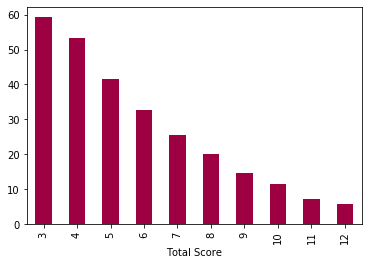

In [59]:
rfm_seg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Spectral');

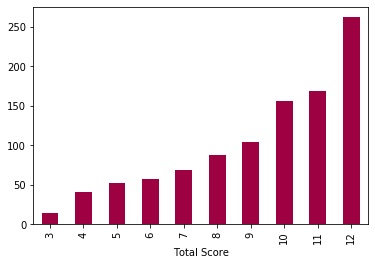

In [60]:
rfm_seg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Spectral');

From the plots above we can see that combined score is consistent in ordering R,F and M

In [61]:
rfm_seg.sort_values(by=['RFMClass', 'monetary_value'], ascending=False)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
lylty_card_nbr,,,,,,,,
1287,280.0,1,9.2,4,4,4,444,12
2164,230.0,1,9.2,4,4,4,444,12
2283,365.0,1,9.2,4,4,4,444,12
3285,303.0,1,9.2,4,4,4,444,12
4025,353.0,1,9.2,4,4,4,444,12
...,...,...,...,...,...,...,...,...
259050,21.0,6,40.2,1,1,1,111,3
269172,5.0,6,40.2,1,1,1,111,3
70202,10.0,6,40.1,1,1,1,111,3
